# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [3]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection  import train_test_split

from sklearn.cluster import KMeans

from scipy.stats import zscore

from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist


from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer 

In [5]:
data_og = pd.read_csv('stock_data.csv')

In [6]:
data = data_og.copy()

## Data Overview

- Observations
- Sanity checks

In [7]:
display(data.head())
data.shape

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

(340, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [9]:
data.describe(include='all')

Ticker Symbol                 Security  GICS Sector  \
count            340                      340          340   
unique           340                      340           11   
top              AAL  American Airlines Group  Industrials   
freq               1                        1           53   
mean             NaN                      NaN          NaN   
std              NaN                      NaN          NaN   
min              NaN                      NaN          NaN   
25%              NaN                      NaN          NaN   
50%              NaN                      NaN          NaN   
75%              NaN                      NaN          NaN   
max              NaN                      NaN          NaN   

                         GICS Sub Industry  Current Price  Price Change  \
count                                  340     340.000000    340.000000   
unique                                 104            NaN           NaN   
top     Oil & Gas Exploration & Production            NaN           NaN   
freq                                    16            NaN           NaN   
mean                                   NaN      80.862345      4.078194   
std                                    NaN      98.055086     12.006338   
min                                    NaN       4.500000    -47.129693   
25%                                    NaN      38.555000     -0.939484   
50%                                    NaN      59.705000      4.819505   
75%                                    NaN      92.880001     10.695493   
max                                    NaN    1274.949951     55.051683   

        Volatility         ROE  Cash Ratio  Net Cash Flow    Net Income  \
count   340.000000  340.000000  340.000000   3.400000e+02  3.400000e+02   
unique         NaN         NaN         NaN            NaN           NaN   
top            NaN         NaN         NaN            NaN           NaN   
freq           NaN         NaN         NaN            NaN           NaN   
mean      1.525976   39.597059   70.023529   5.553762e+07  1.494385e+09   
std       0.591798   96.547538   90.421331   1.946365e+09  3.940150e+09   
min       0.733163    1.000000    0.000000  -1.120800e+10 -2.352800e+10   
25%       1.134878    9.750000   18.000000  -1.939065e+08  3.523012e+08   
50%       1.385593   15.000000   47.000000   2.098000e+06  7.073360e+08   
75%       1.695549   27.000000   99.000000   1.698108e+08  1.899000e+09   
max       4.580042  917.000000  958.000000   2.076400e+10  2.444200e+10   

        Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  \
count           340.000000                  3.400000e+02  340.000000   
unique                 NaN                           NaN         NaN   
top                    NaN                           NaN         NaN   
freq                   NaN                           NaN         NaN   
mean              2.776662                  5.770283e+08   32.612563   
std               6.587779                  8.458496e+08   44.348731   
min             -61.200000                  2.767216e+07    2.935451   
25%               1.557500                  1.588482e+08   15.044653   
50%               2.895000                  3.096751e+08   20.819876   
75%               4.620000                  5.731175e+08   31.764755   
max              50.090000                  6.159292e+09  528.039074   

         P/B Ratio  
count   340.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean     -1.718249  
std      13.966912  
min     -76.119077  
25%      -4.352056  
50%      -1.067170  
75%       3.917066  
max     129.064585

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [10]:
cat_cols = data.select_dtypes(include='object').columns

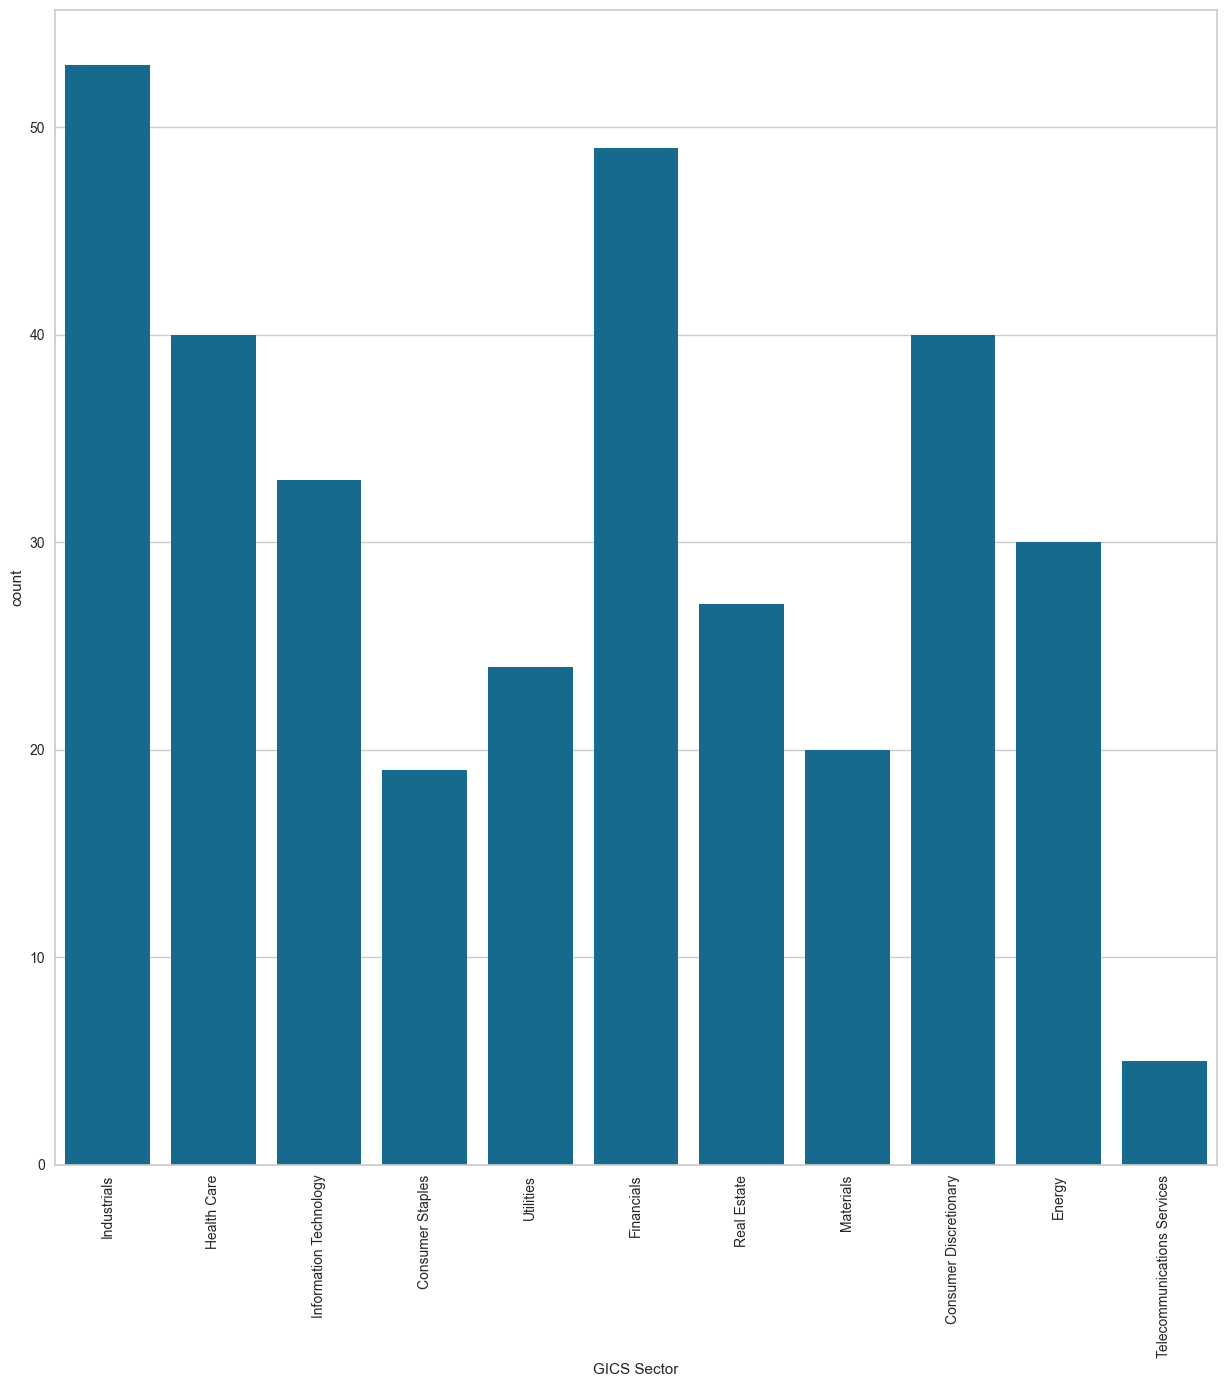

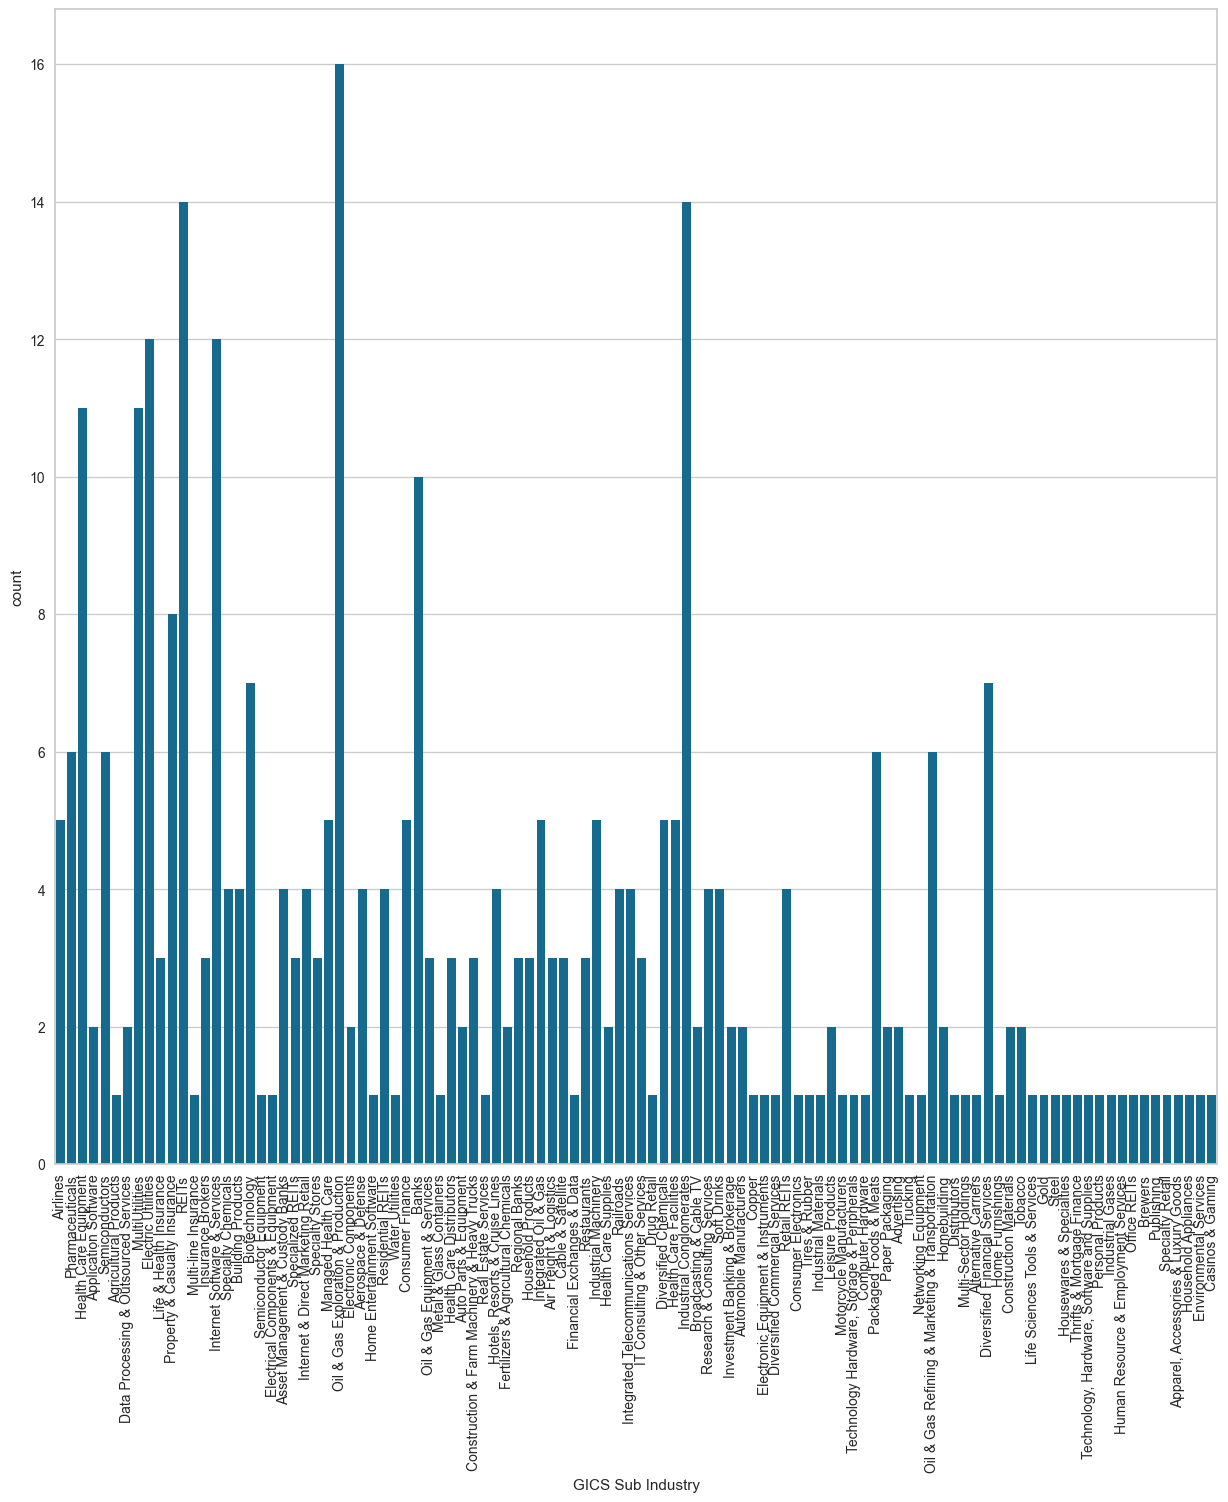

In [11]:
for i in cat_cols.drop(['Ticker Symbol','Security']):
    plt.figure(figsize=(15,15))
    sns.countplot(data, x=i)
    plt.xticks(rotation=90)
    plt.show()
    

For the GICS Sector, it seems Industrials and Financials have the highest count. For the sub industry, Oil & Gas Exploration & Production have the highest count

In [12]:
num_cols = data.select_dtypes(exclude='object').columns

In [13]:
def hist_box(data,xvar):
    f, ax = plt.subplots(nrows=2, sharex=True, figsize =(10,10))
    
    sns.boxplot(data = data, x=xvar, showmeans=True, ax=ax[0])
    
    sns.histplot(data = data,x = xvar, ax=ax[1])
    ax[1].axvline(data[xvar].mean(), color='red')
    
    
    plt.show()

Mean of Current Price:80.86 

Histogram/Boxplot for Current Price:


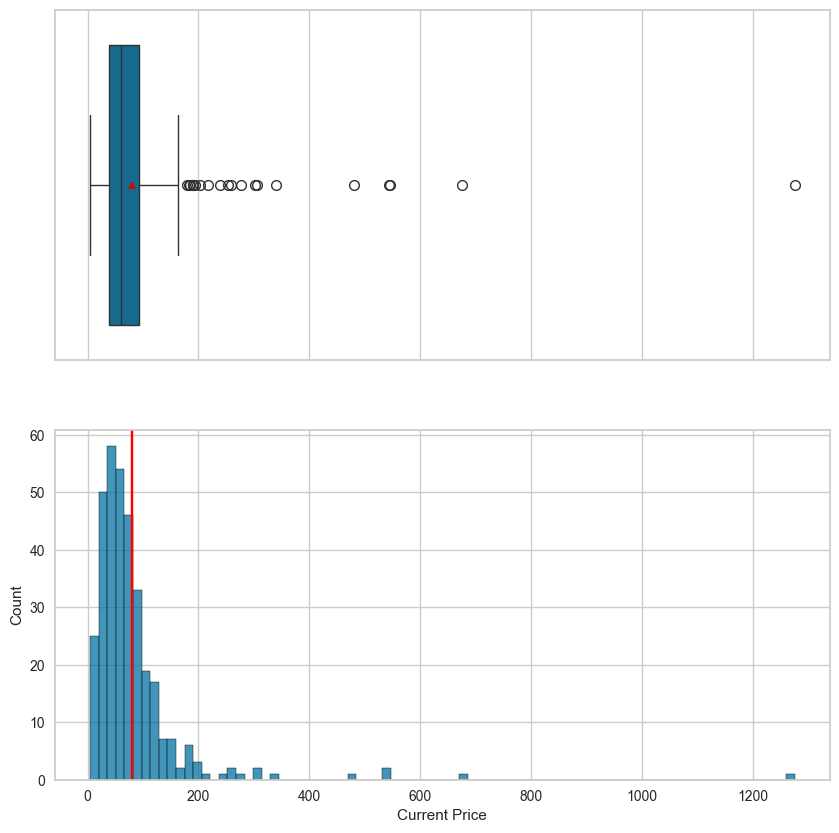

----------------------------------------------------------------------------------------------------
Mean of Price Change:4.08 

Histogram/Boxplot for Price Change:


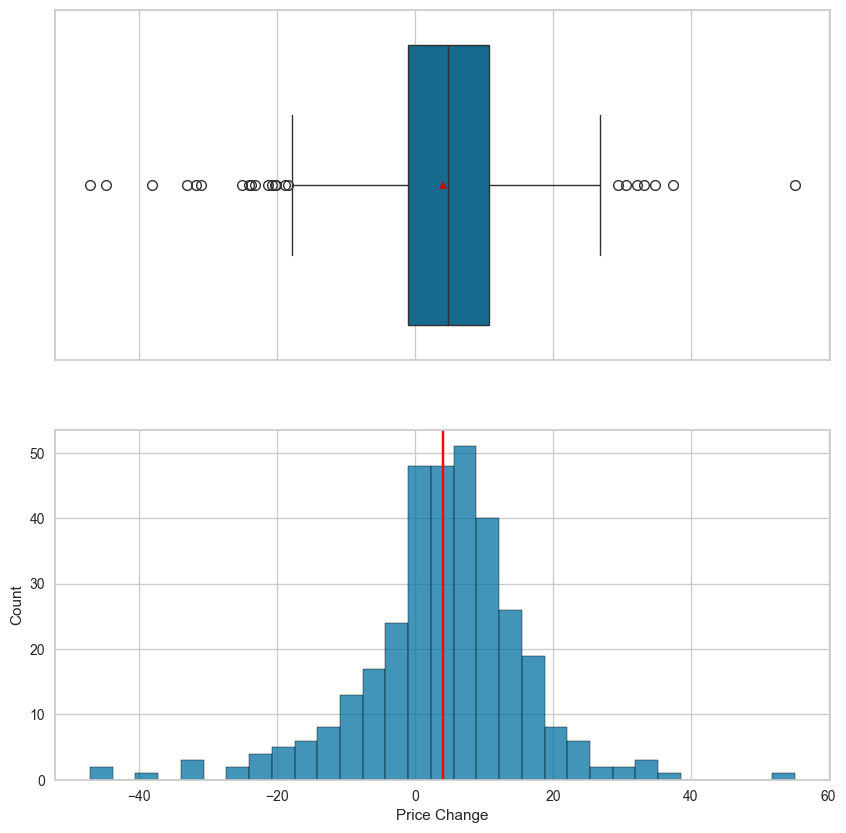

----------------------------------------------------------------------------------------------------
Mean of Volatility:1.53 

Histogram/Boxplot for Volatility:


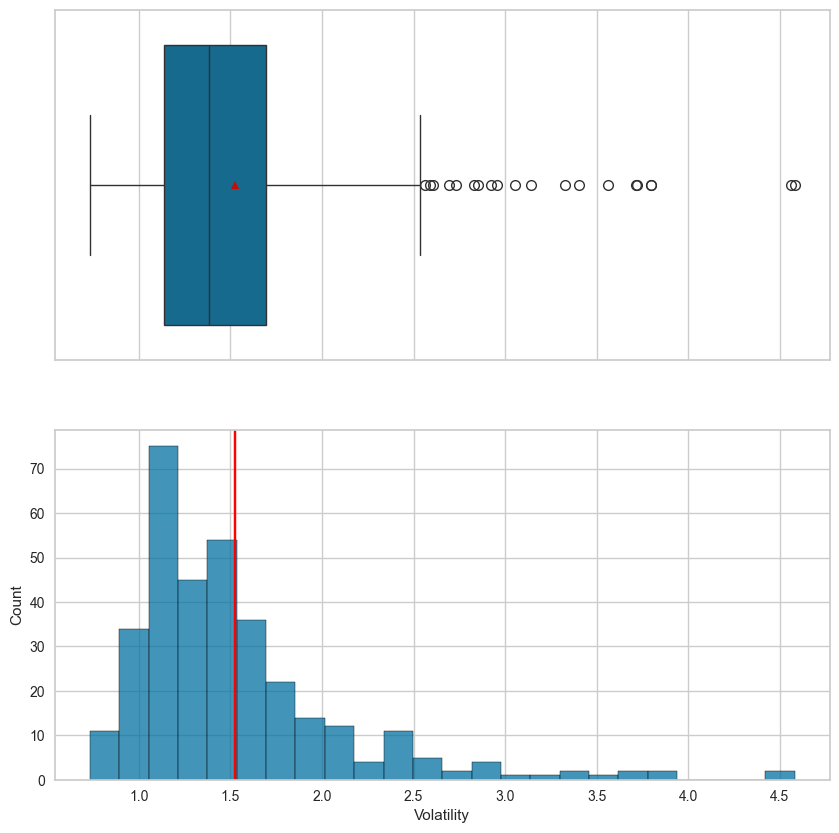

----------------------------------------------------------------------------------------------------
Mean of ROE:39.6 

Histogram/Boxplot for ROE:


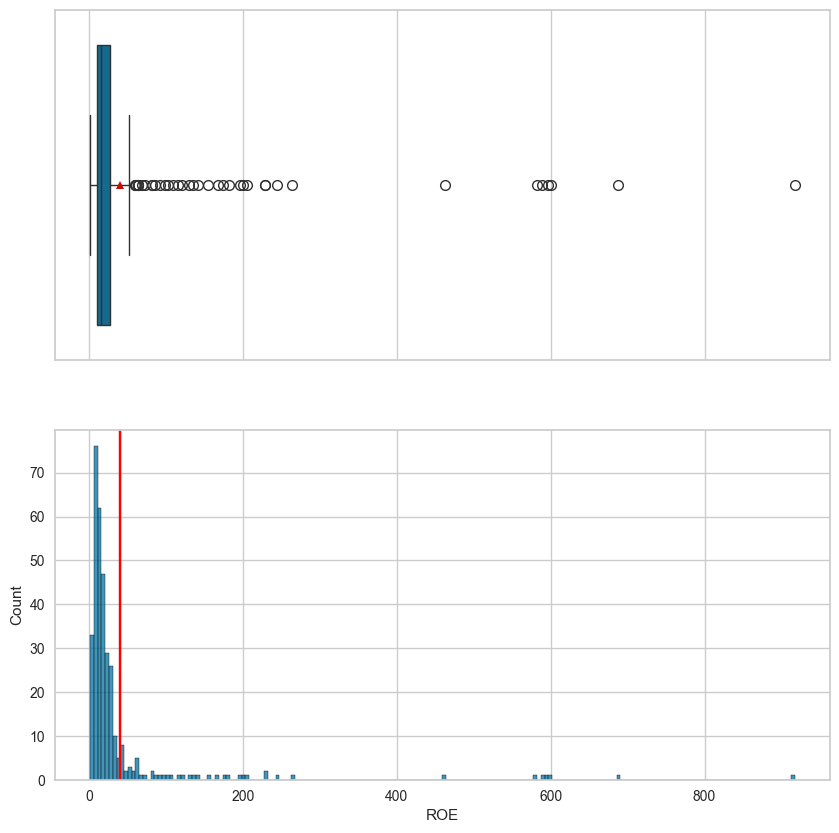

----------------------------------------------------------------------------------------------------
Mean of Cash Ratio:70.02 

Histogram/Boxplot for Cash Ratio:


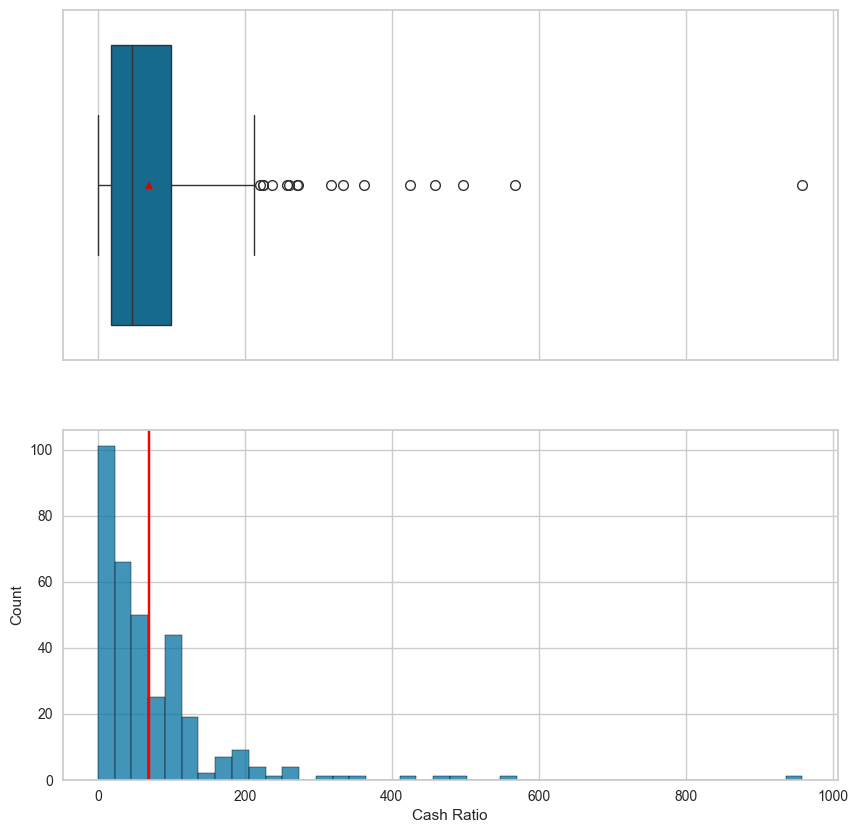

----------------------------------------------------------------------------------------------------
Mean of Net Cash Flow:55537620.59 

Histogram/Boxplot for Net Cash Flow:


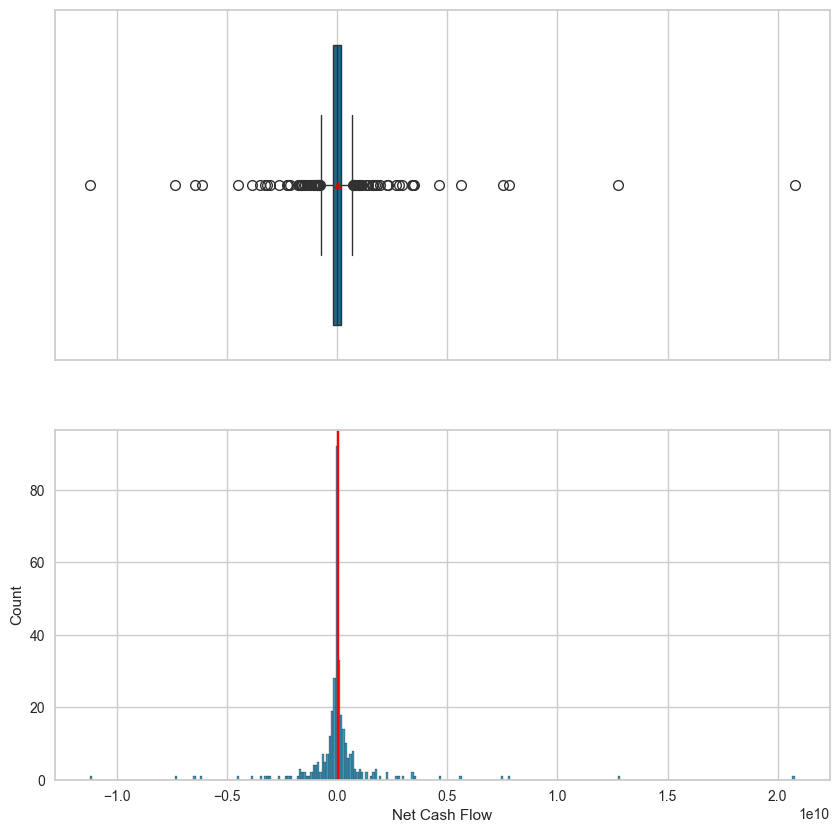

----------------------------------------------------------------------------------------------------
Mean of Net Income:1494384602.94 

Histogram/Boxplot for Net Income:


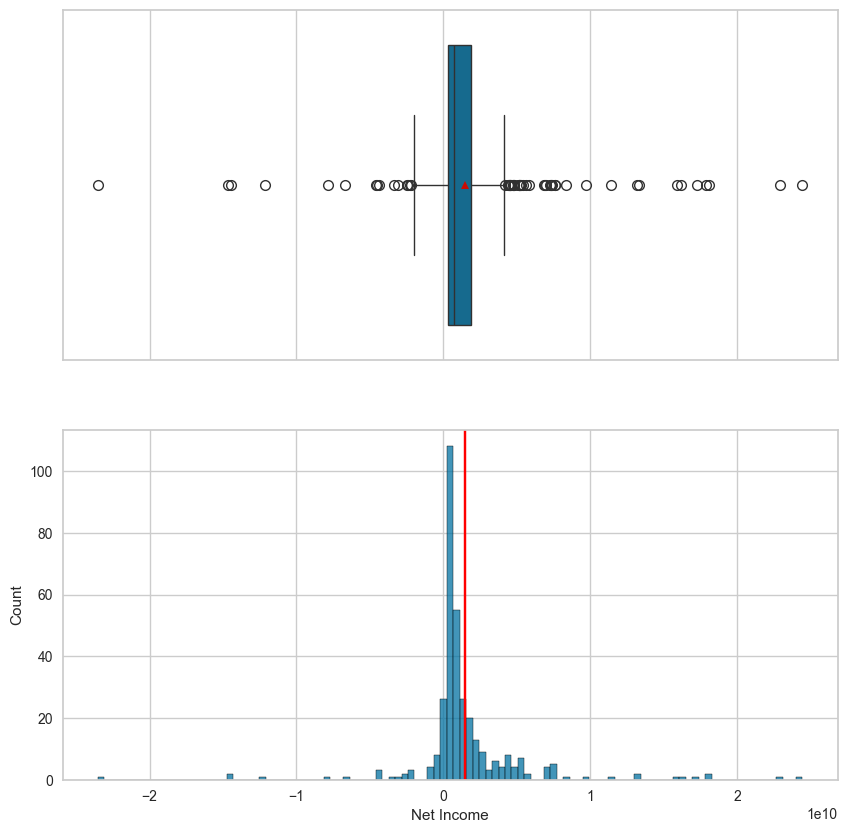

----------------------------------------------------------------------------------------------------
Mean of Earnings Per Share:2.78 

Histogram/Boxplot for Earnings Per Share:


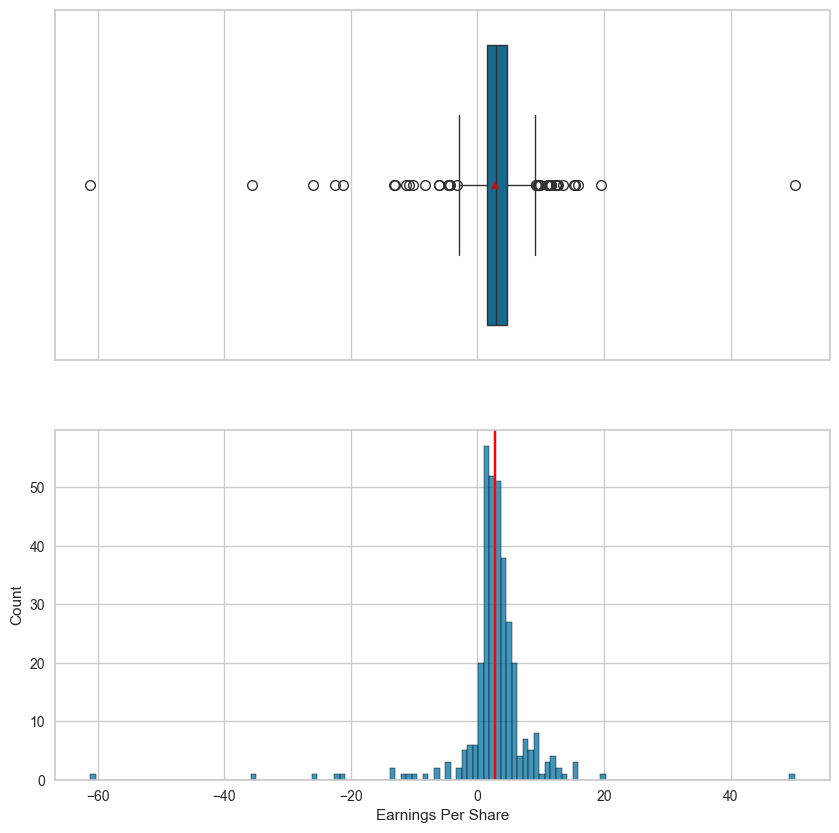

----------------------------------------------------------------------------------------------------
Mean of Estimated Shares Outstanding:577028337.75 

Histogram/Boxplot for Estimated Shares Outstanding:


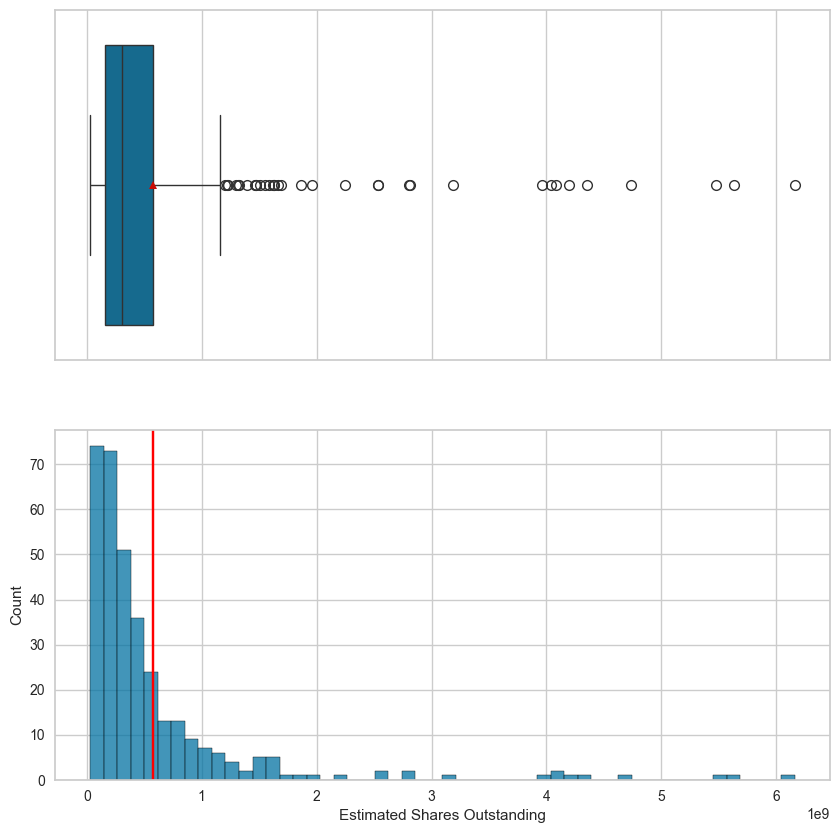

----------------------------------------------------------------------------------------------------
Mean of P/E Ratio:32.61 

Histogram/Boxplot for P/E Ratio:


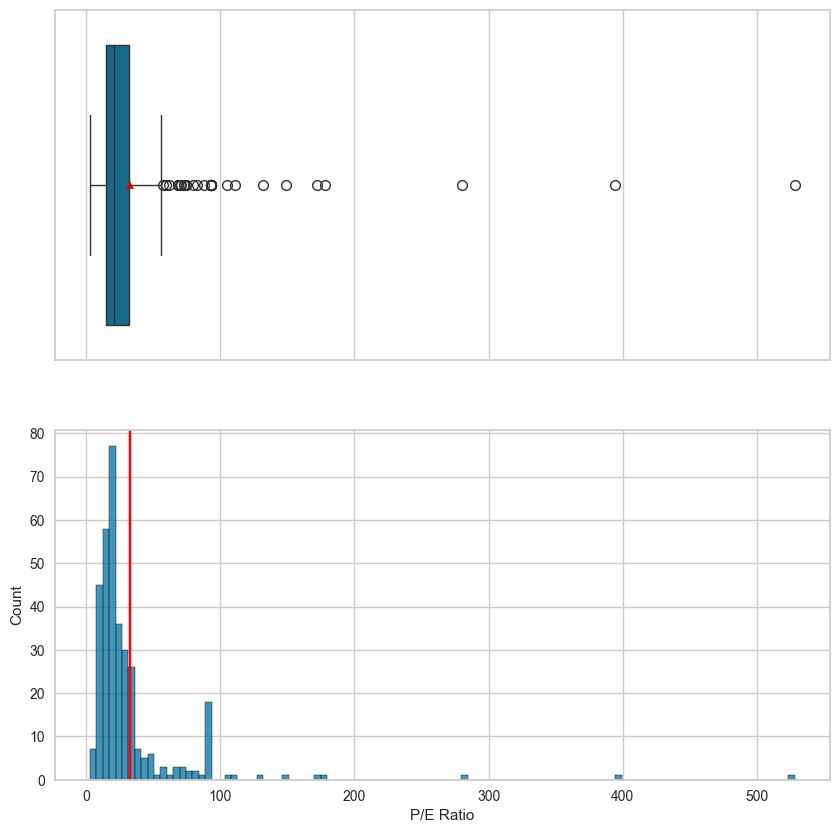

----------------------------------------------------------------------------------------------------
Mean of P/B Ratio:-1.72 

Histogram/Boxplot for P/B Ratio:


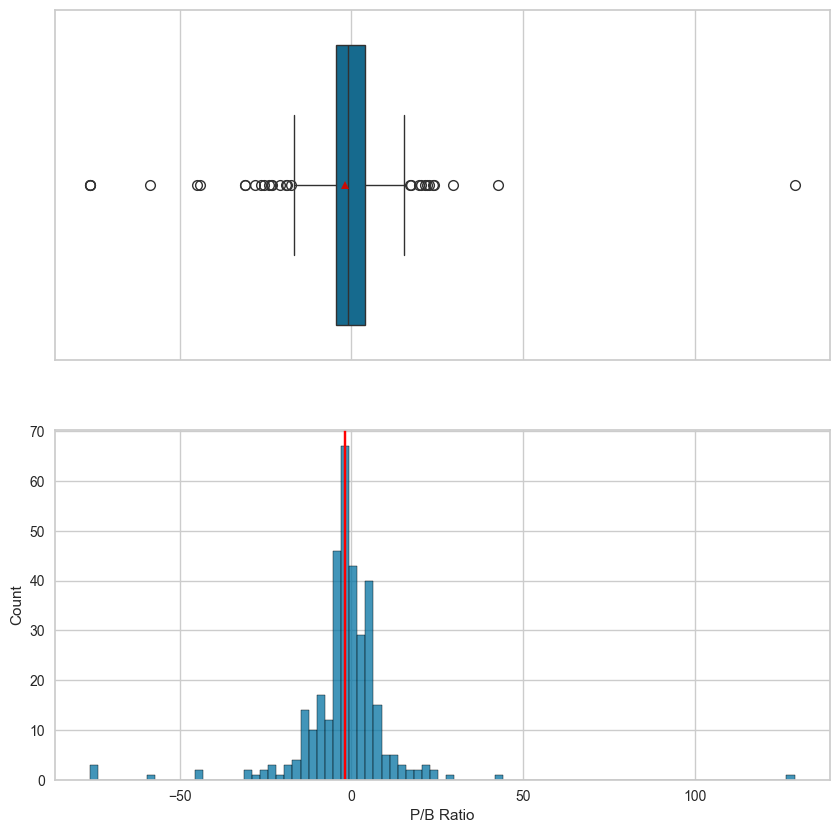

----------------------------------------------------------------------------------------------------


In [14]:
for i in num_cols:
    print('Mean of {}:{} \n'.format(i,round(data[i].mean(),2)))
    print('Histogram/Boxplot for {}:'.format(i))
    hist_box(data,i)
    print('-'*100)

Current Price, Volatility, ROE, Shares Outstanding, and P/E Ratio are all fairly right skewed with positive outliers. The other numerical features show a more normal distribution. 

### Bivariate Analysis

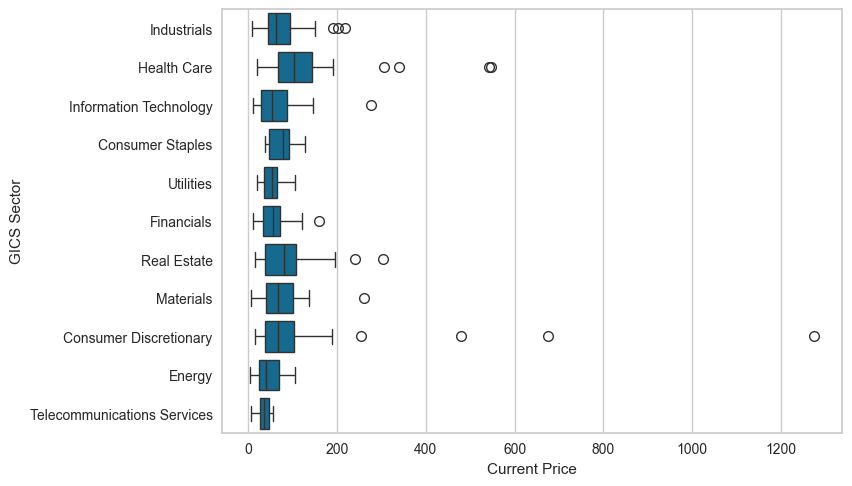

----------------------------------------------------------------------------------------------------


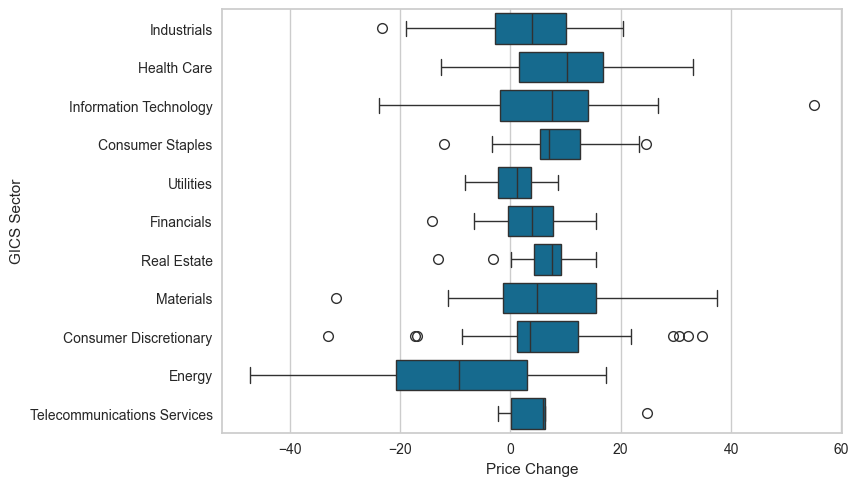

----------------------------------------------------------------------------------------------------


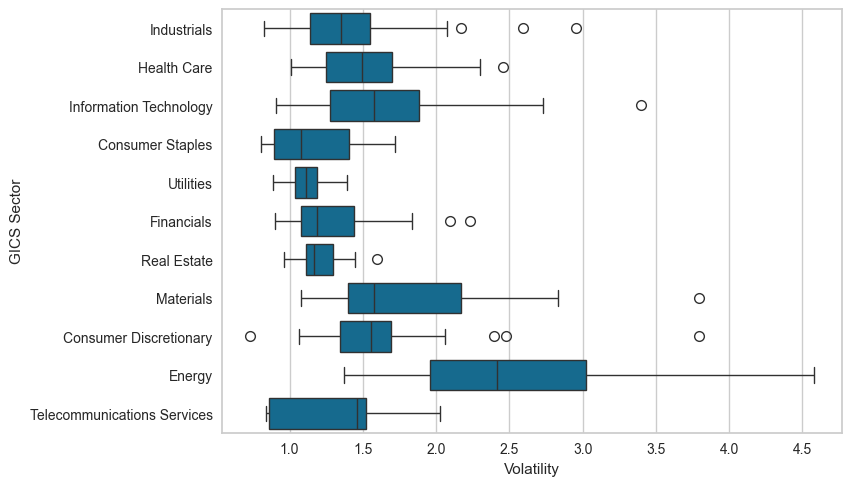

----------------------------------------------------------------------------------------------------


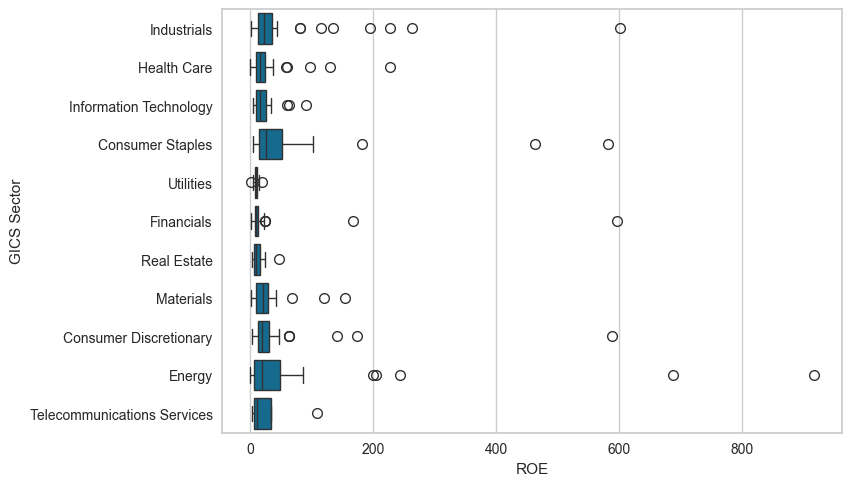

----------------------------------------------------------------------------------------------------


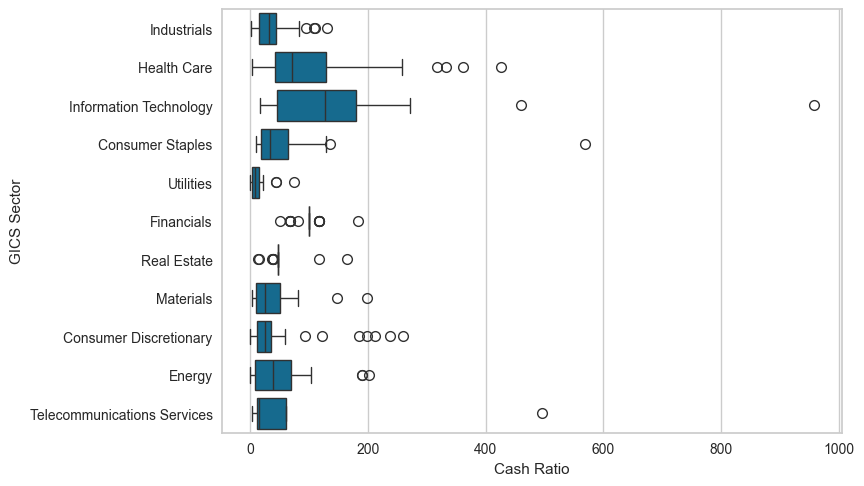

----------------------------------------------------------------------------------------------------


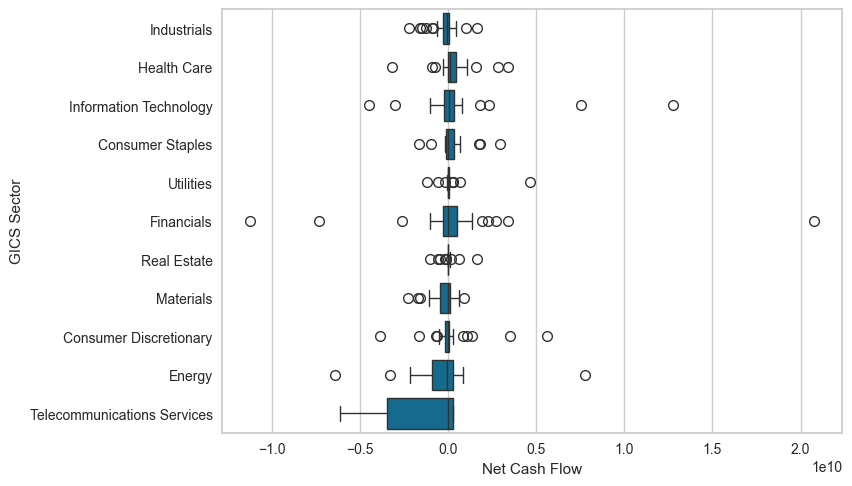

----------------------------------------------------------------------------------------------------


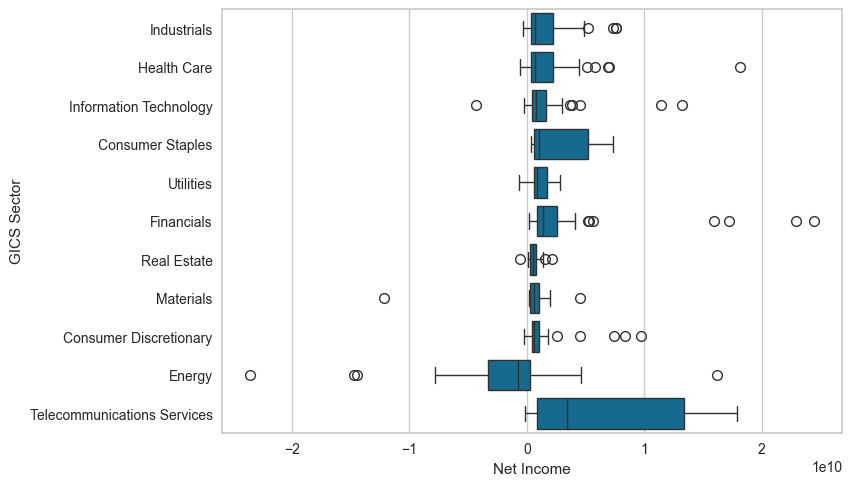

----------------------------------------------------------------------------------------------------


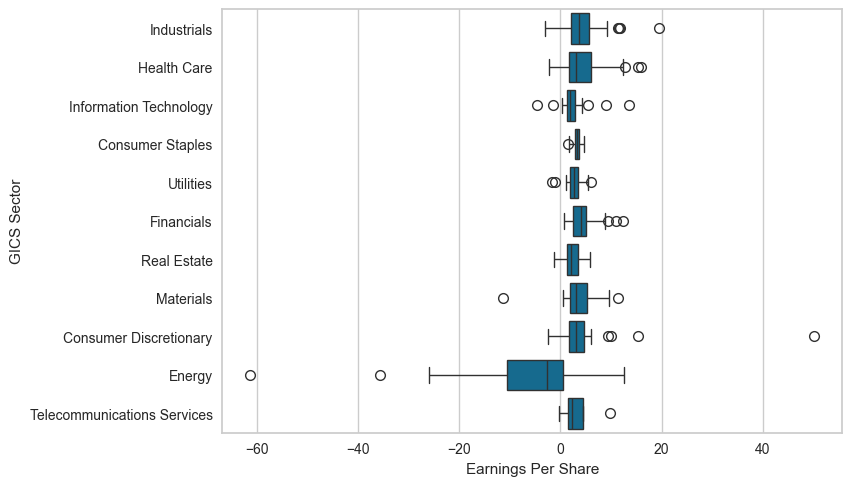

----------------------------------------------------------------------------------------------------


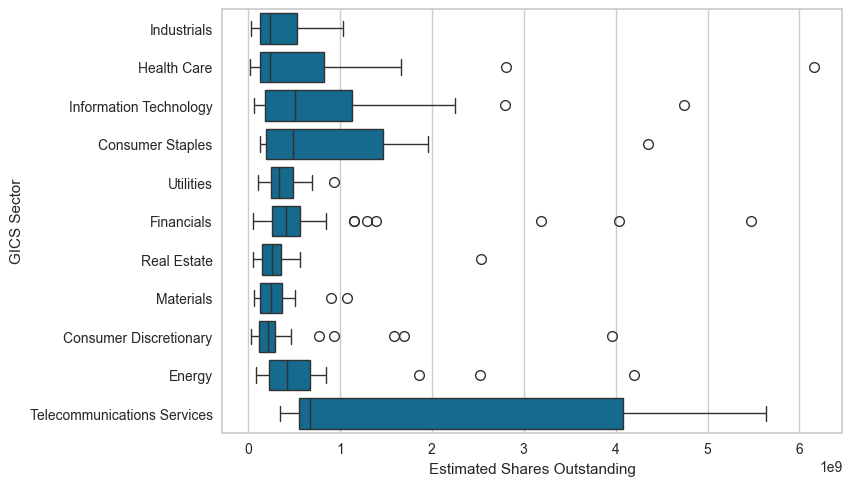

----------------------------------------------------------------------------------------------------


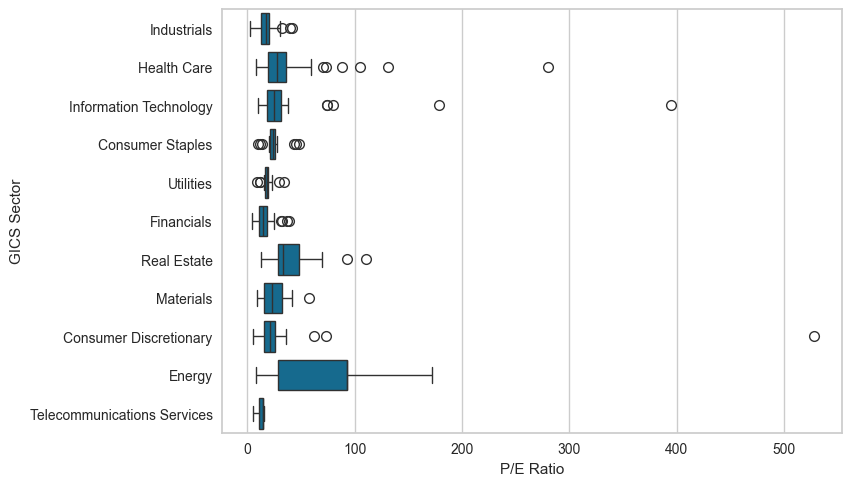

----------------------------------------------------------------------------------------------------


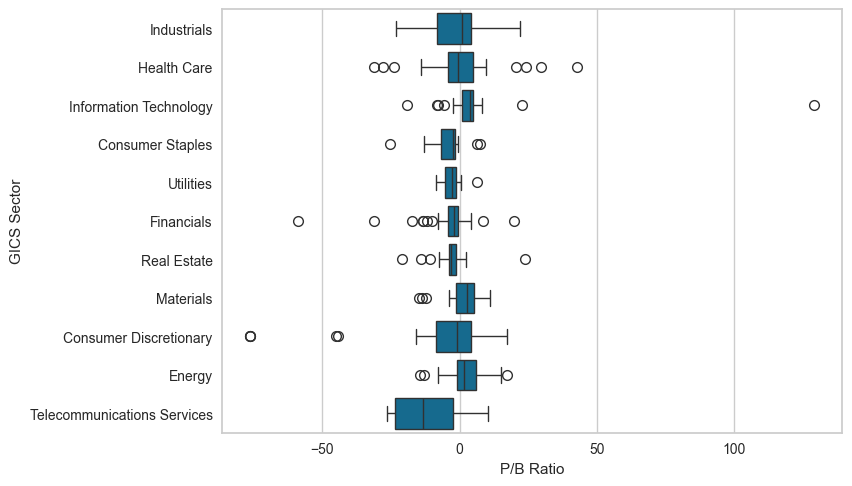

----------------------------------------------------------------------------------------------------


In [15]:
for i in num_cols:
    sns.boxplot(data, x=i, y='GICS Sector')
    plt.show()
    print('-'*100)

One intersting thing to note is that the Energy sector has the highest median volatilty. 

<Axes: >

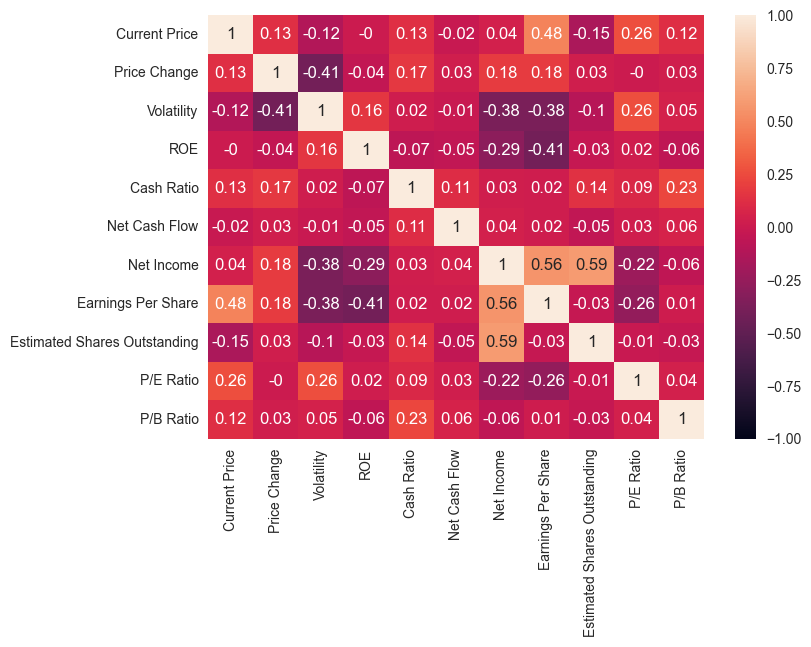

In [16]:
sns.heatmap(data=round(data.corr(),2), annot=True, vmin=-1,vmax=1)

The heatmap shows some correlations. Net income is fairly positively correlated with outstanding shares and Earnings Per Share. Current Price and Earnings per share are also fairly correlated. The most negatively correlated features are Volatility and Price change, along with Earnings Per Share and ROE.

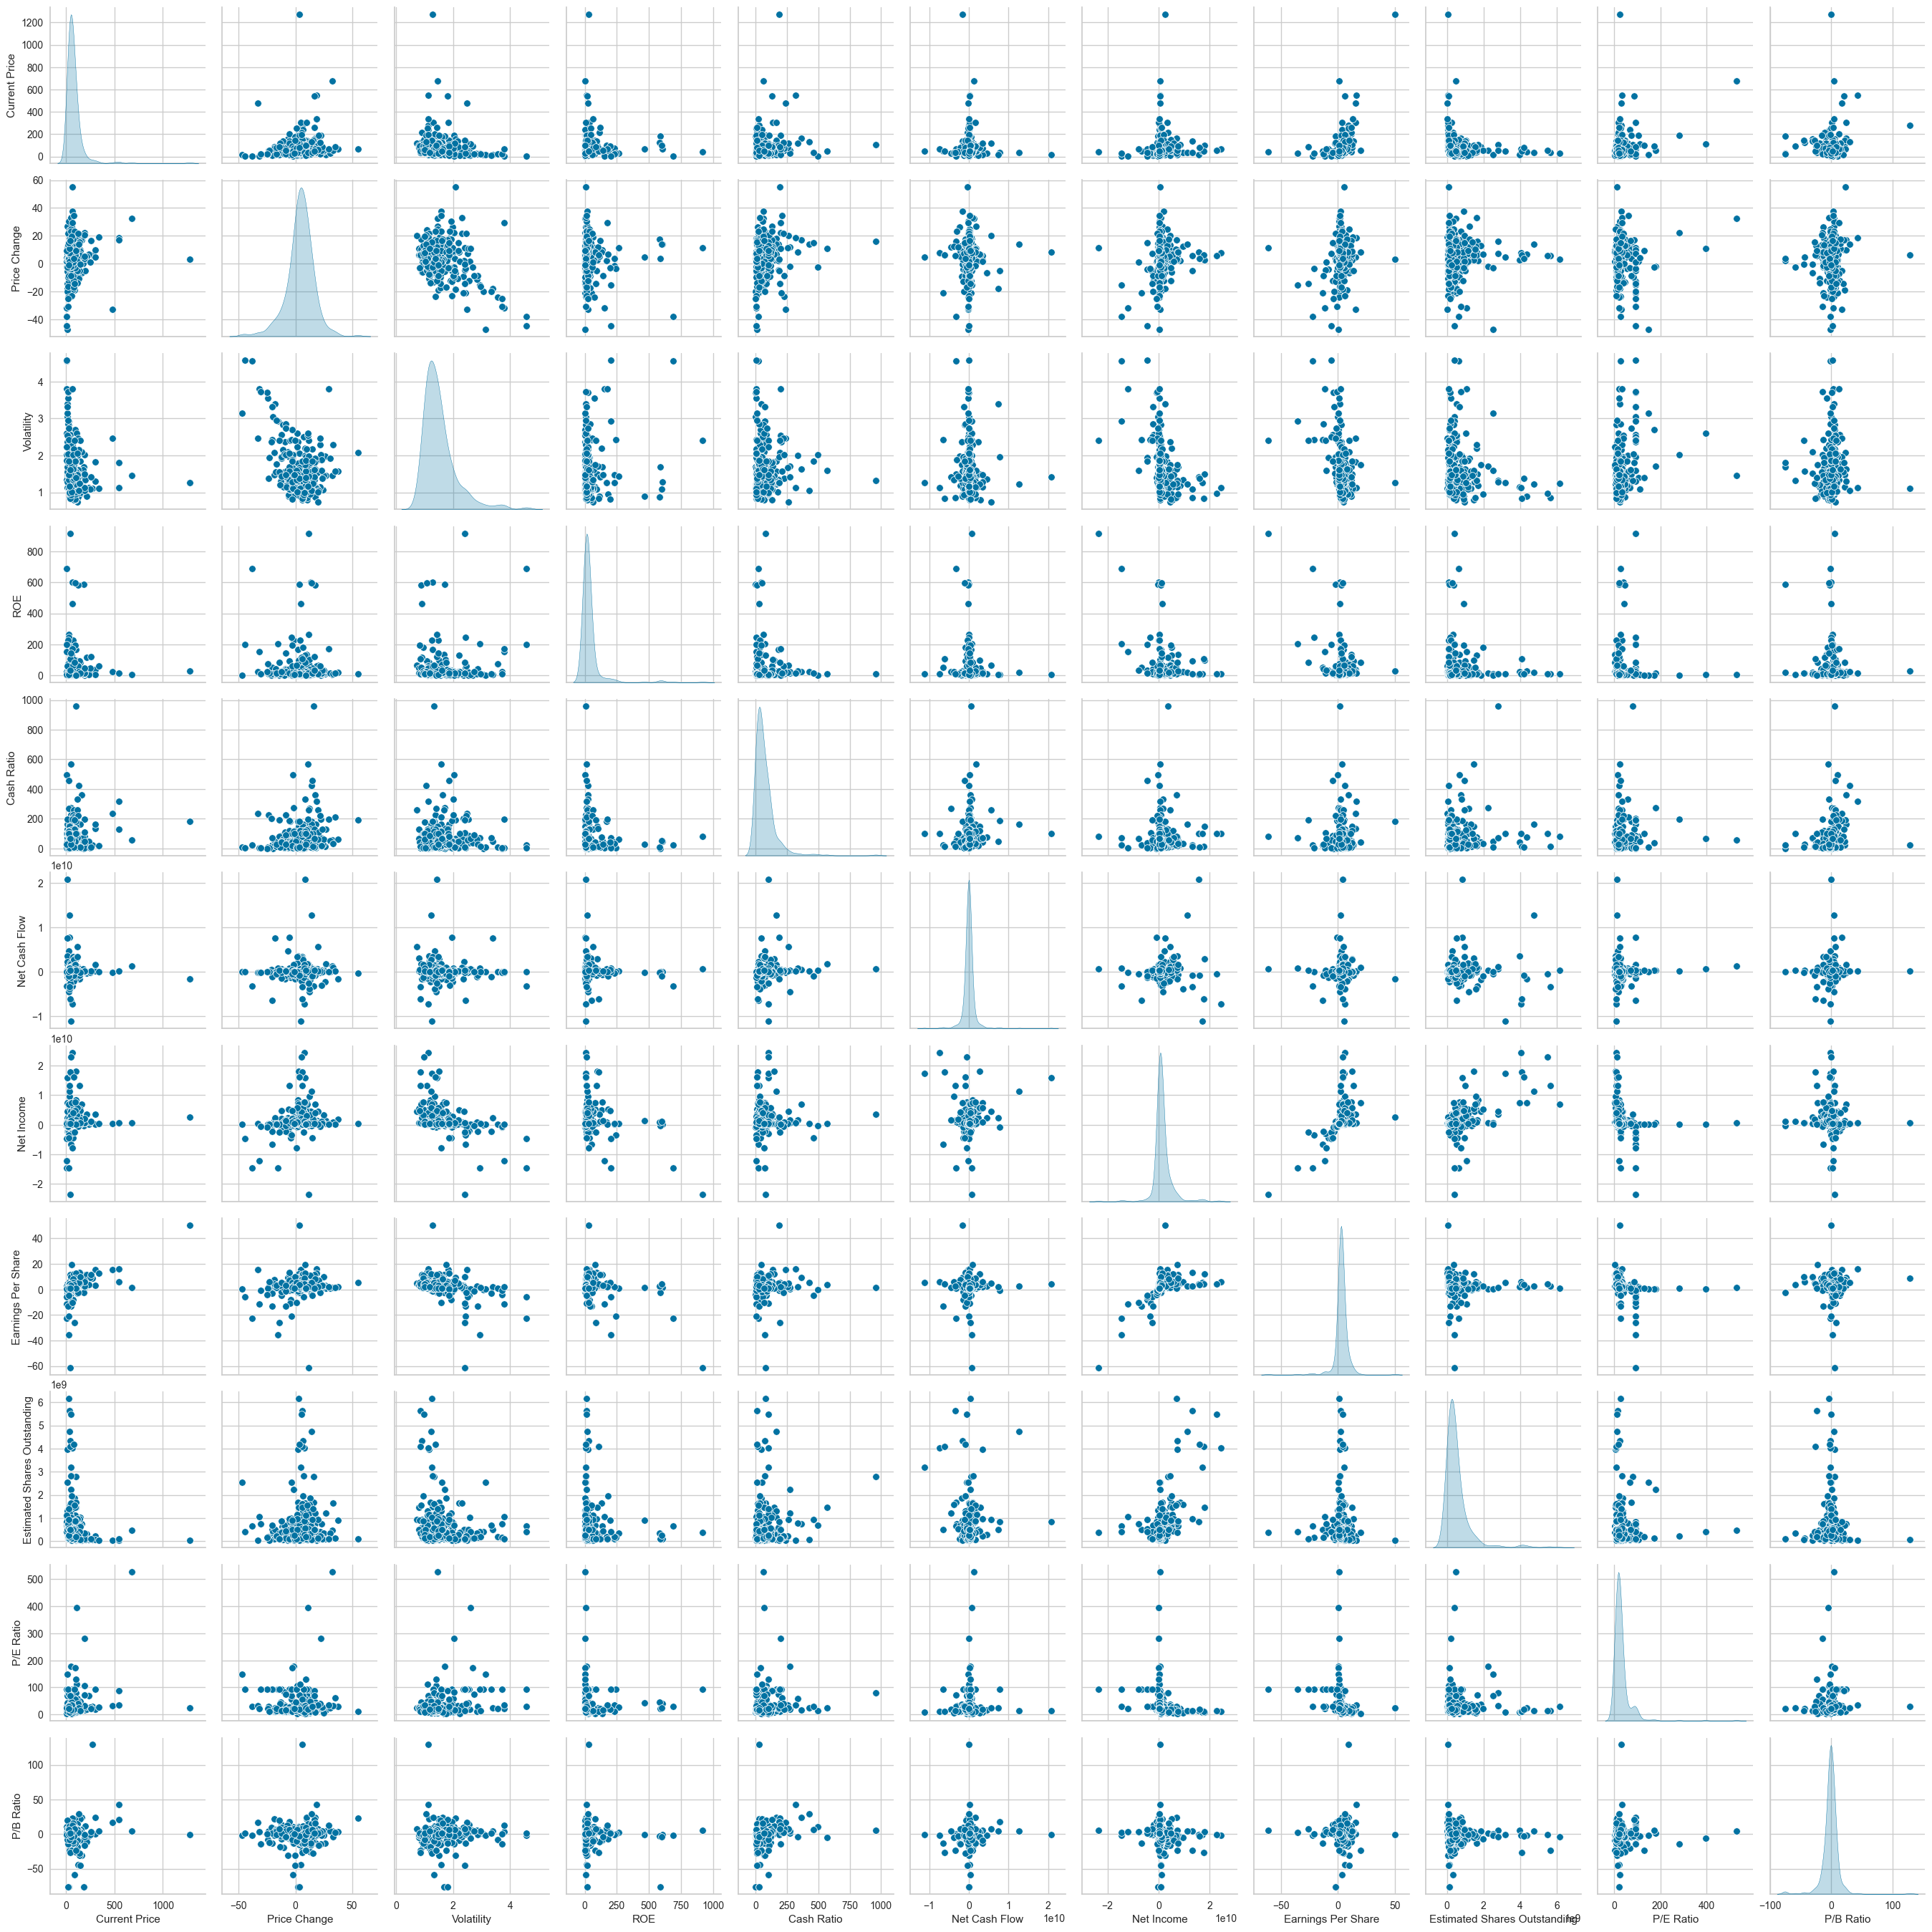

In [17]:
sns.pairplot(data, diag_kind='kde')

### Questions

#### *What does the distribution of stock prices look like?*

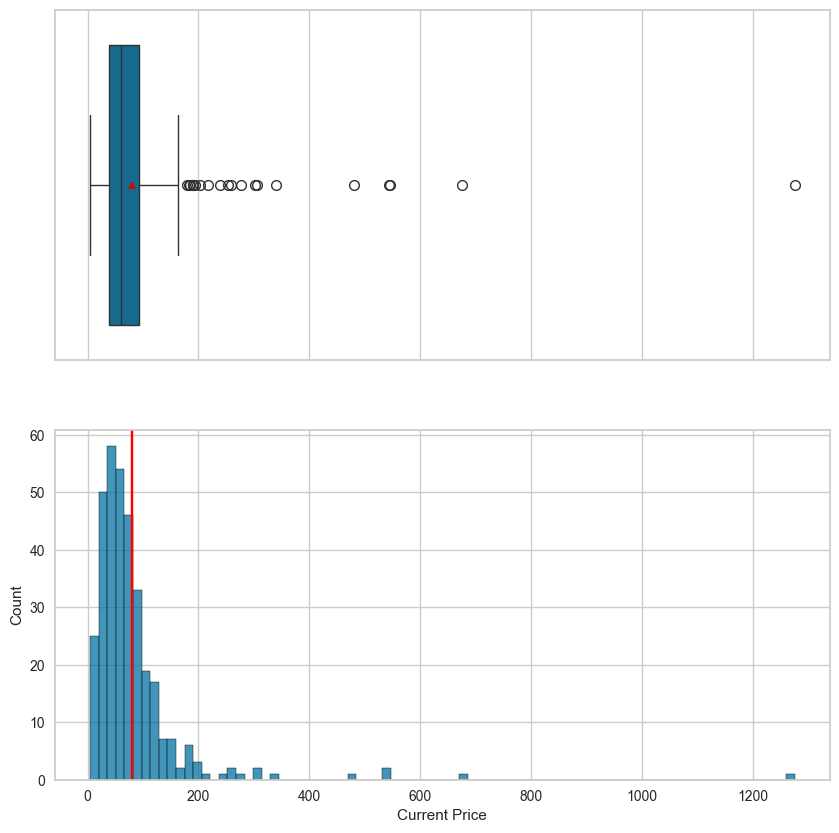

In [18]:
hist_box(data, 'Current Price')

It is fairly right skewed with a far outlier. 

#### *The stocks of which economic sector have seen the maximum price increase on average?*


In [19]:
data.groupby('GICS Sector')['Price Change'].mean().sort_values(ascending=False).head(1)

GICS Sector
Health Care    9.585652
Name: Price Change, dtype: float64

The healthcare sector has had the highest average price change.

#### *How are the different variables correlated with each other?*

<Axes: >

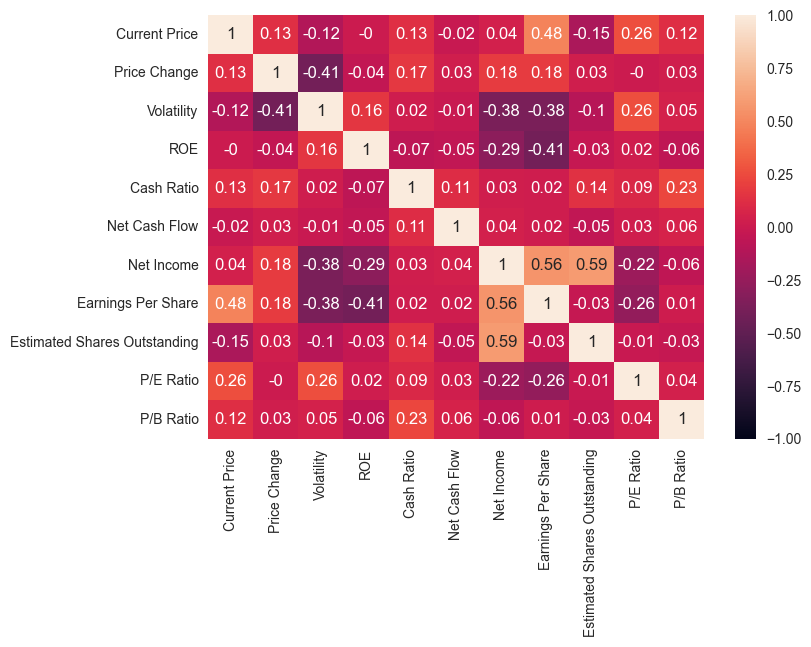

In [20]:
sns.heatmap(data=round(data.corr(),2), annot=True, vmin=-1,vmax=1)

The heatmap shows some correlations. Net income is fairly positively correlated with outstanding shares and Earnings Per Share. Current Price and Earnings per share are also fairly correlated. The most negatively correlated features are Volatility and Price change, along with Earnings Per Share and ROE.

#### *Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?*

In [21]:
data.groupby('GICS Sector')['Cash Ratio'].mean().sort_values(ascending=False)

GICS Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash Ratio, dtype: float64

<Axes: xlabel='Cash Ratio', ylabel='GICS Sector'>

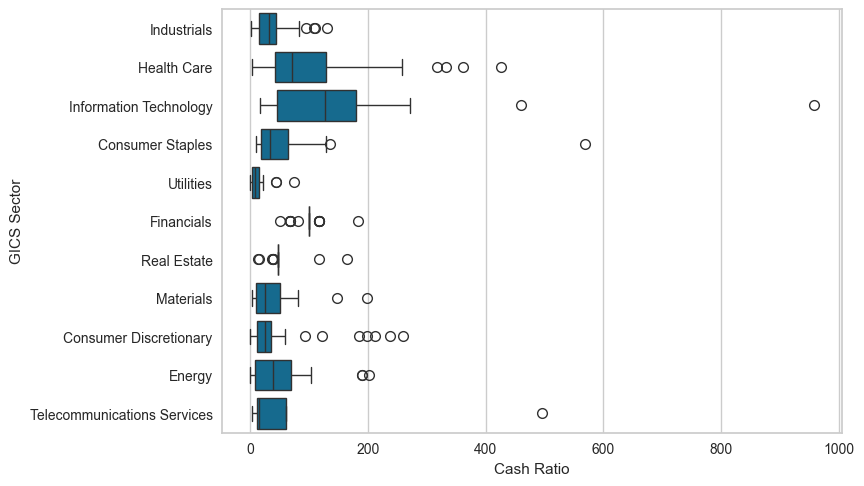

In [22]:
sns.boxplot(data, x='Cash Ratio', y='GICS Sector')

The Information Technology sector has the highest Cash Ratio average value while the Utilities sector has the lowest. 

#### *P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?*

In [23]:
data.groupby('GICS Sector')['P/E Ratio'].mean().sort_values(ascending=False)

GICS Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E Ratio, dtype: float64

<Axes: xlabel='P/E Ratio', ylabel='GICS Sector'>

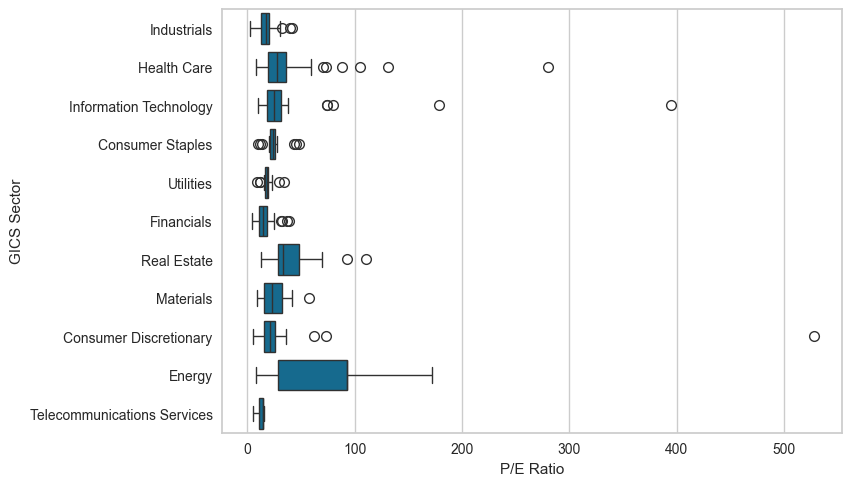

In [24]:
sns.boxplot(data, x='P/E Ratio', y='GICS Sector')

The Energy sector has the highest average P/E Ratio while the Telecommunication Services has the lowest. 

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [25]:
data.duplicated().sum()

0

In [26]:
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

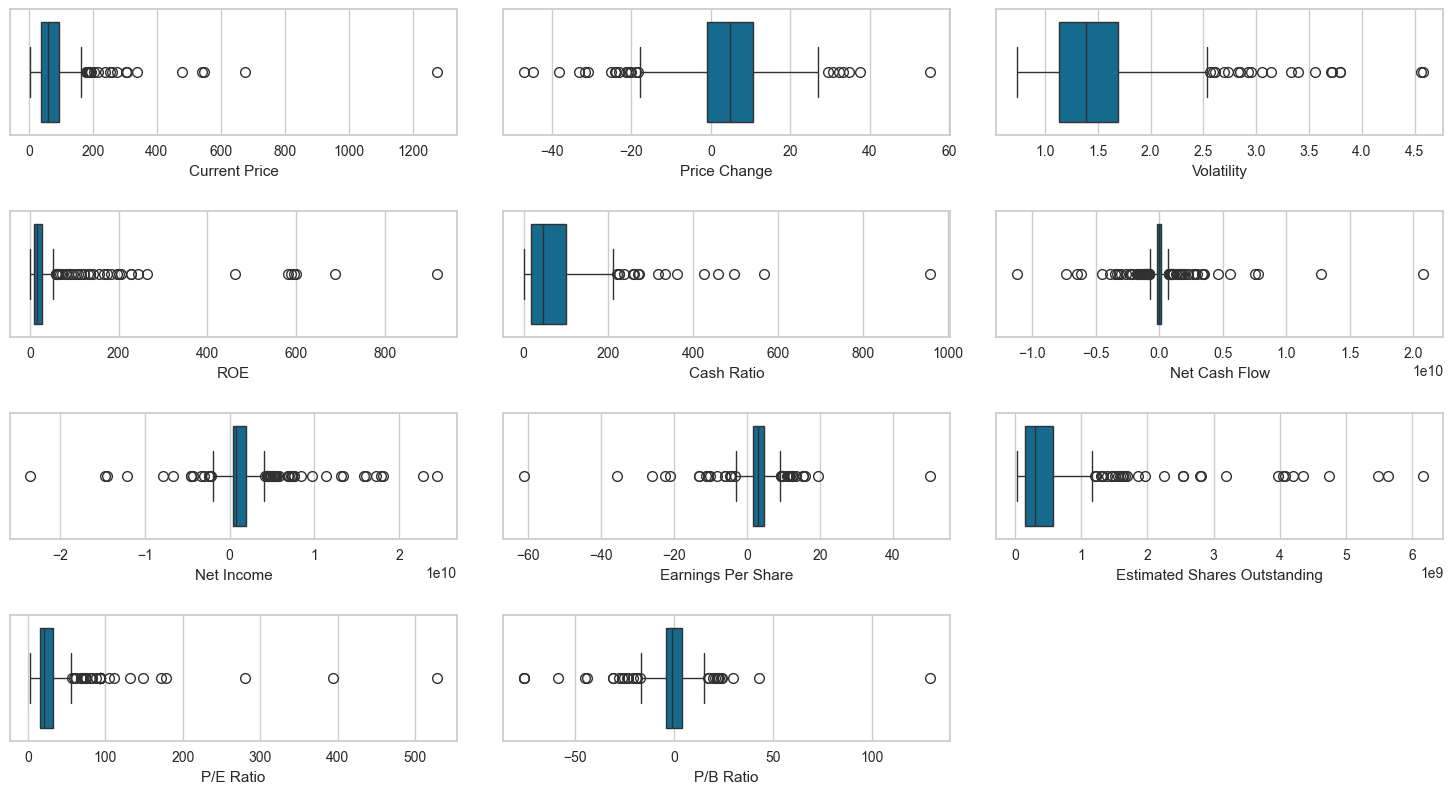

In [27]:
plt.figure(figsize=(15,10))

for i, x in enumerate(num_cols):
    plt.subplot(5,3, i + 1)
    sns.boxplot(data=data, x=x)
    plt.tight_layout(pad=2)
        
plt.show()

There are outliers in the data, but they make sense in the context of the data, so they will be kept. 

#### Data Scaling

In [28]:
df = data.drop(['Ticker Symbol','Security'],axis=1)

In [29]:
for i in df.columns:
    if df[i].dtype == 'O':
        df[i] = df[i].astype('category')   

In [30]:
dfscaled=df[num_cols].apply(zscore)

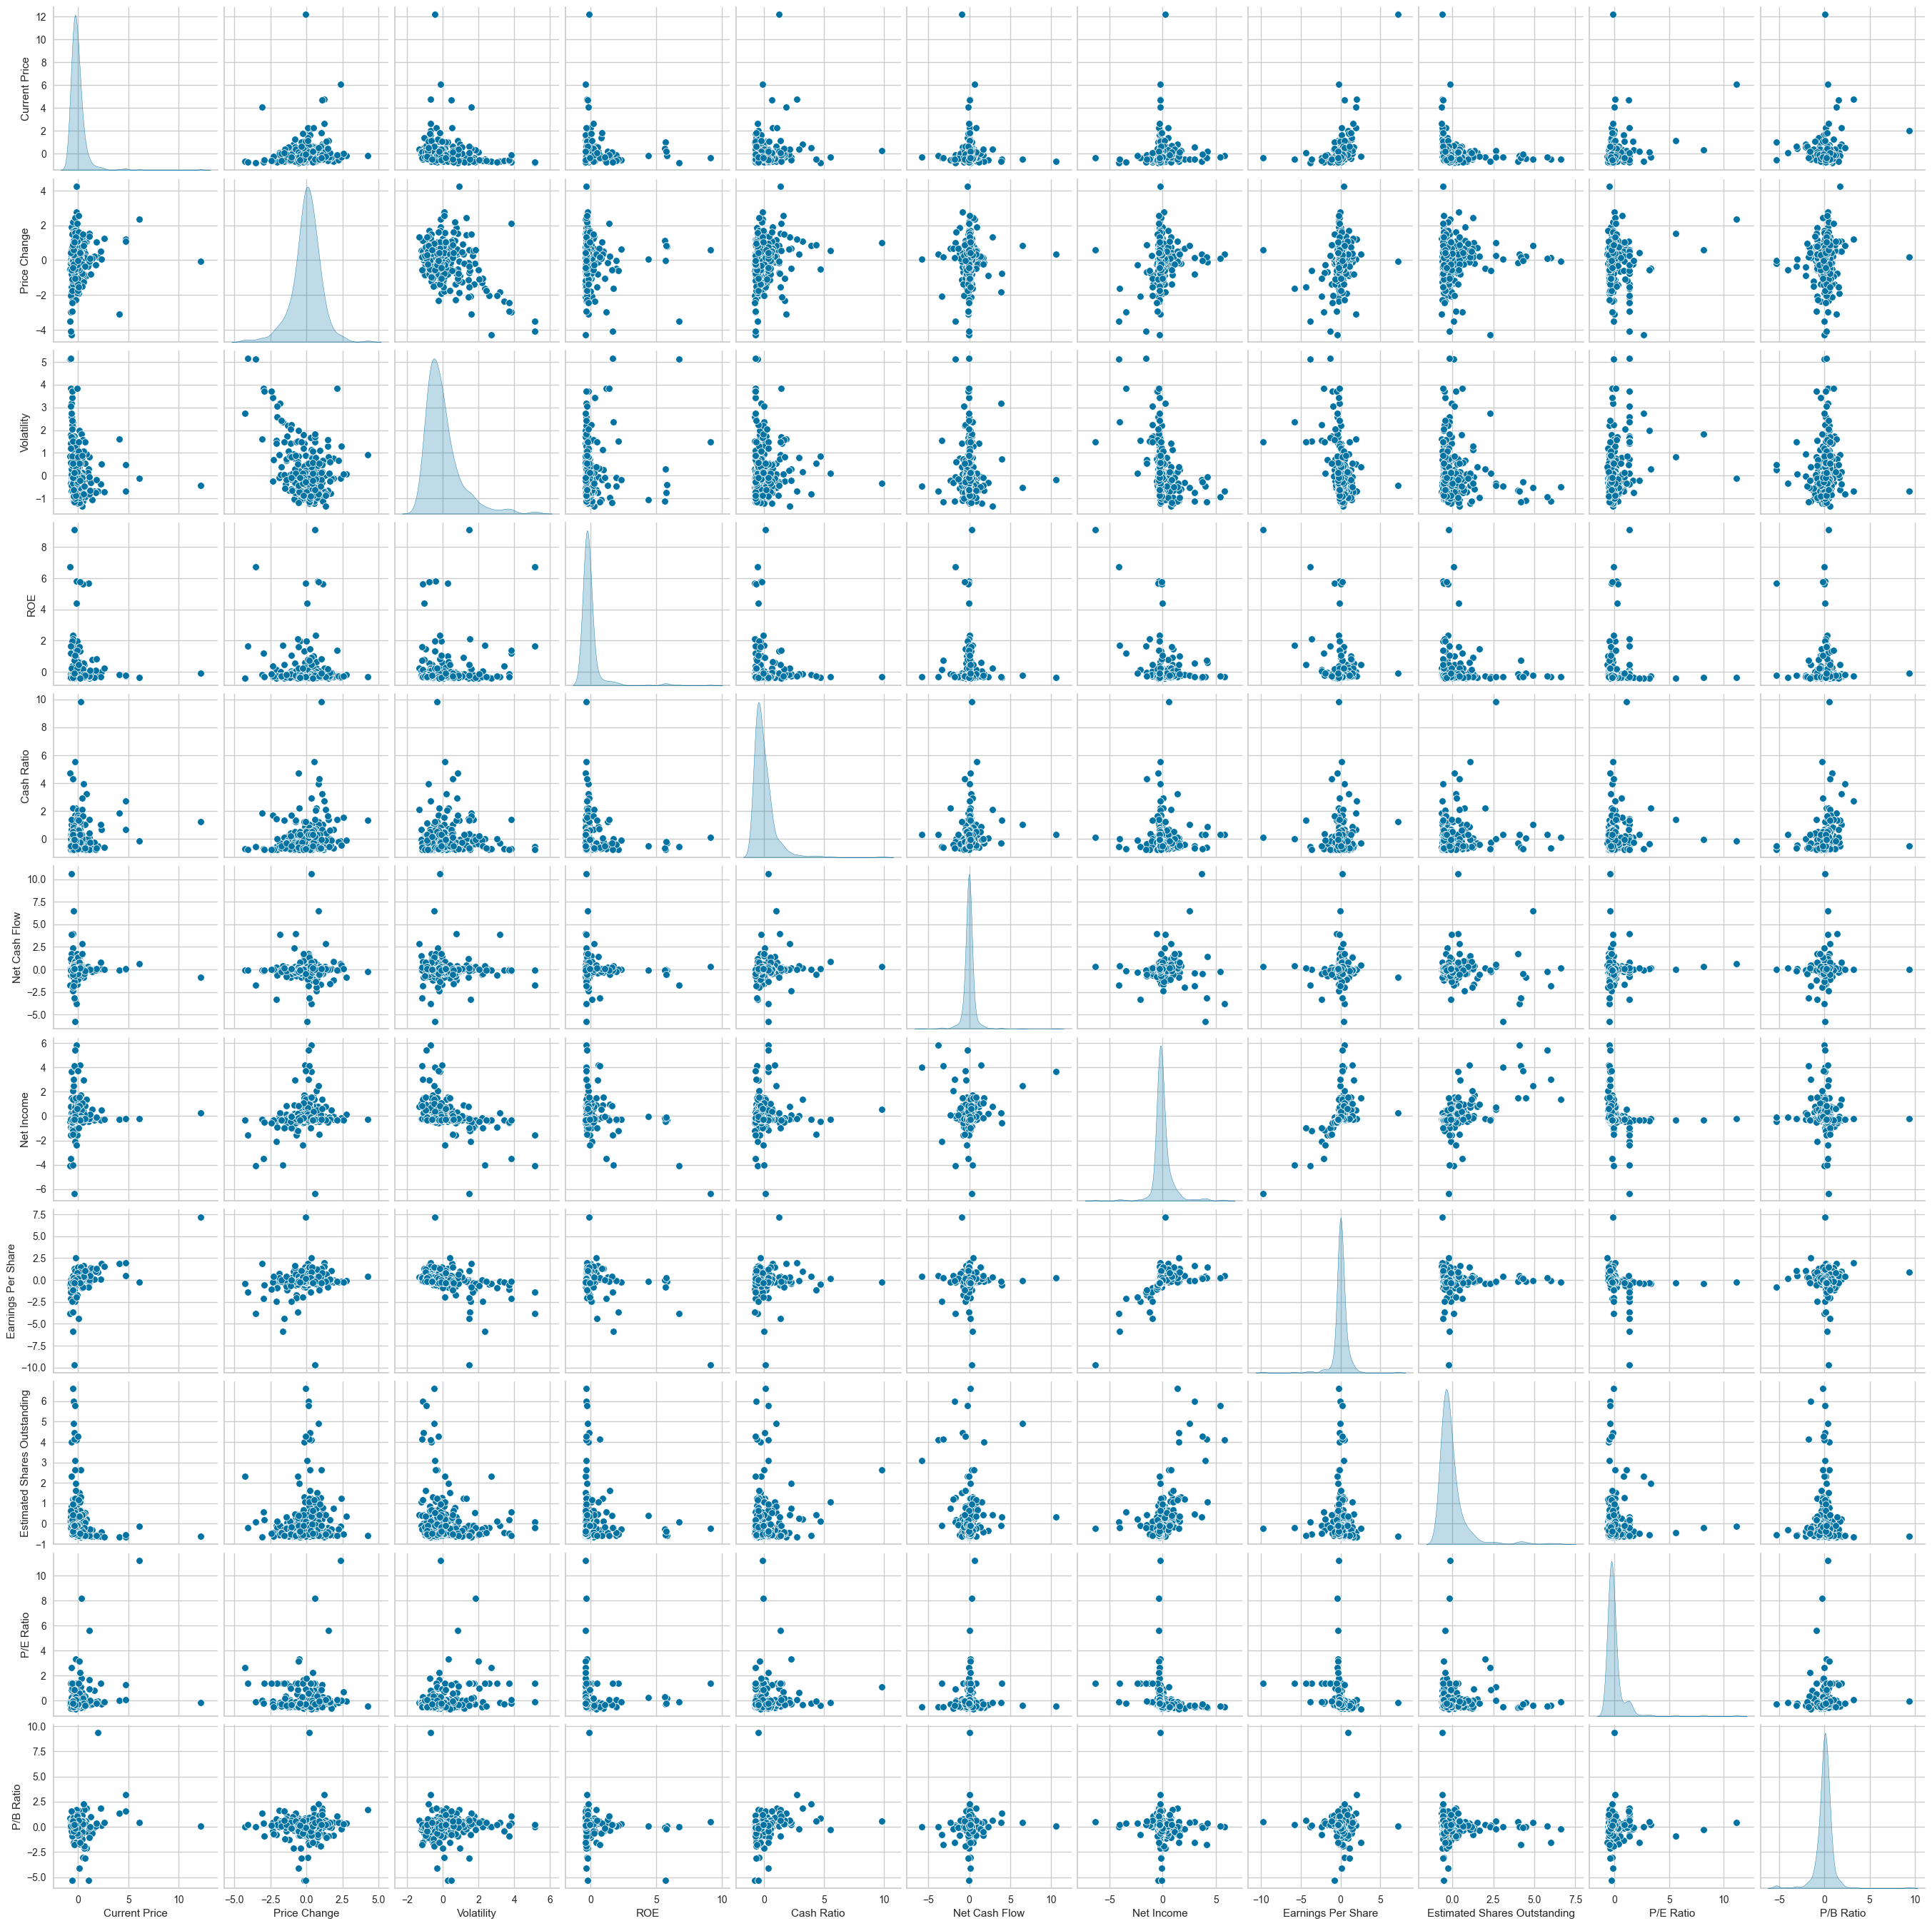

In [31]:
sns.pairplot(dfscaled, diag_kind='kde')

## K-means Clustering

In [32]:
kmeansdata = data.copy()

Text(0, 0.5, 'Average distortion')

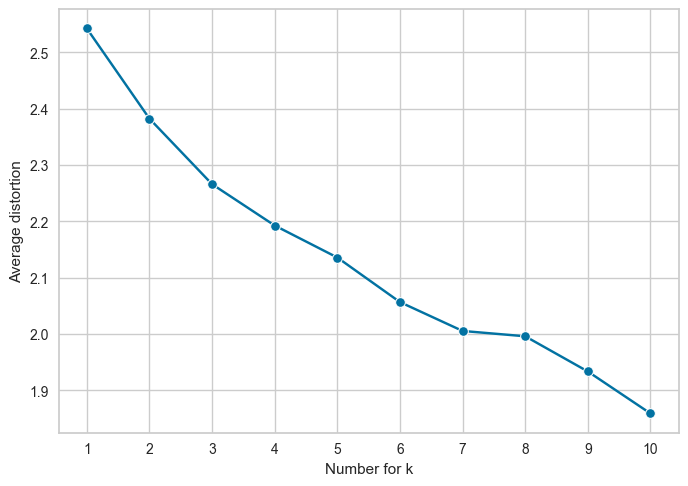

In [33]:
clusters = range(1,11)
mean_distortions = []

for k in clusters:
    model=KMeans(n_clusters=k,random_state=2)
    model.fit(dfscaled)
    predict = model.predict(dfscaled)
    mean_distortions.append(sum(np.min(cdist(dfscaled, model.cluster_centers_, 'euclidean'),axis=1))/dfscaled.shape[0])
    
sns.lineplot(x=clusters, y=mean_distortions, marker='o')
plt.xlabel('Number for k')
plt.xticks(clusters)
plt.ylabel('Average distortion')



The bend isn't entirely clear, but it seems like a cluster count of 6 or 7 gives low distortions while avoiding too much in terms of diminishing returns.

For 2 clusters, the silhouette score is 0.44
For 3 clusters, the silhouette score is 0.464
For 4 clusters, the silhouette score is 0.458
For 5 clusters, the silhouette score is 0.432
For 6 clusters, the silhouette score is 0.401
For 7 clusters, the silhouette score is 0.398
For 8 clusters, the silhouette score is 0.403
For 9 clusters, the silhouette score is 0.378
For 10 clusters, the silhouette score is 0.135


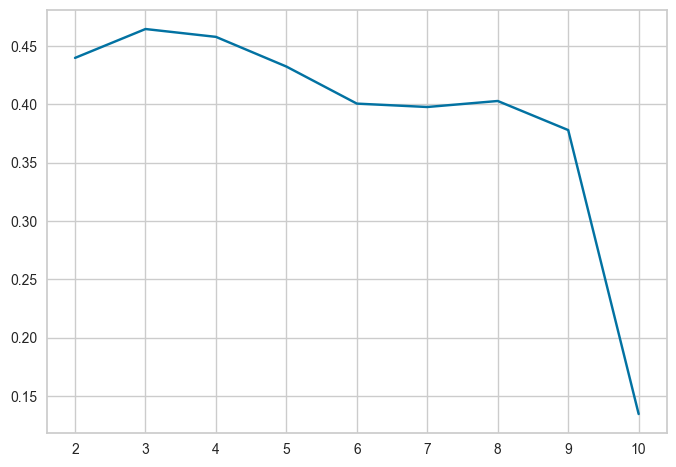

In [34]:
silscore = []
cluster_list=list(range(2,11))

for i in cluster_list:
    clusterer = KMeans(n_clusters=i, random_state=1)
    sil_pred = clusterer.fit_predict((dfscaled))
    score = silhouette_score(dfscaled, sil_pred)
    silscore.append(score)
    print(f'For {i} clusters, the silhouette score is {round(score,3)}')
    
plt.plot(cluster_list, silscore)

The silhouette scores show that, again, 6 or 7 clusters is likely a good option for keeping a high score, while not making too many or too little clusters.

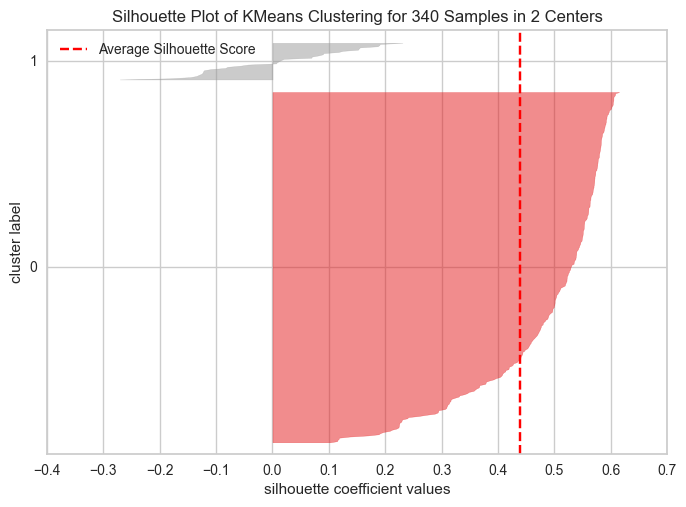

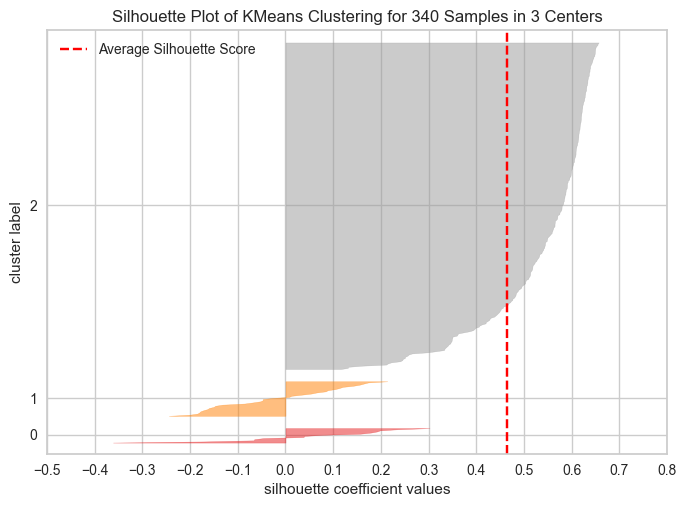

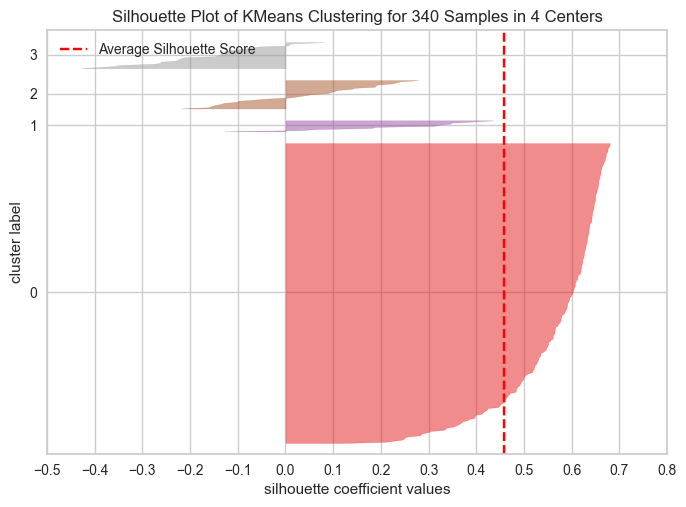

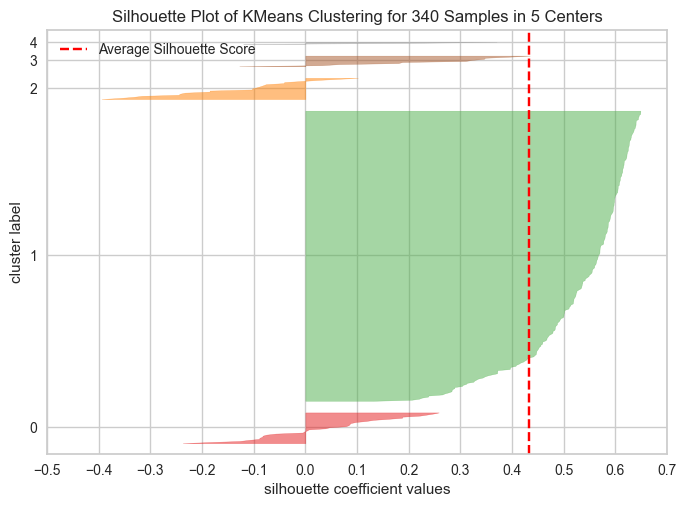

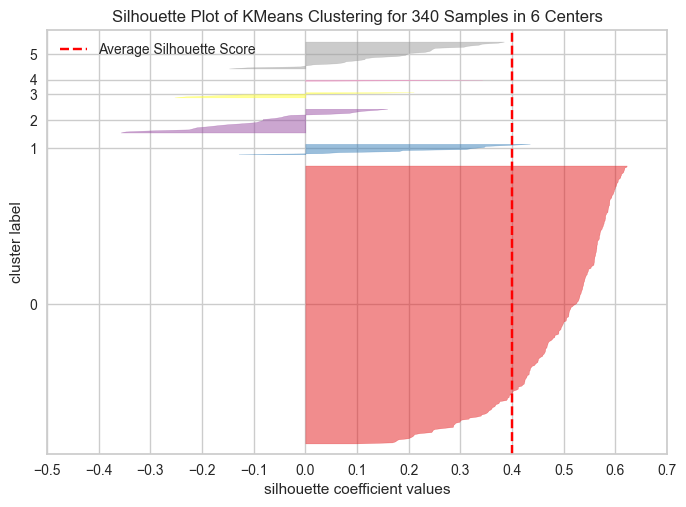

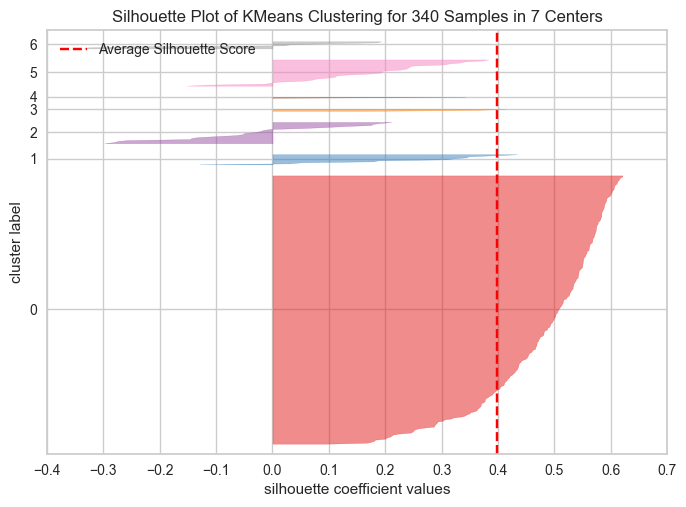

In [35]:
for i in range(2,8):
    visual = SilhouetteVisualizer(KMeans(i, random_state=1))
    visual.fit(dfscaled)
    visual.show()

With the visualizers of the silhouette score and the elbow method, we will go with 6 clusters for our final KMeans model.

#### Final KMeans Model

In [36]:
kmeans_model = KMeans(6,random_state=1)
kmeans_model.fit(dfscaled)
kmeans_predict = kmeans_model.predict(dfscaled)

In [37]:
kmeansdata['KMeans Group'] = kmeans_predict
kmeansdata.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  KMeans Group  
0                  6.681299e+08    3.718174  -8.784219             0  
1                  1.633016e+09   18.806350  -8.750068             0  
2                  1.504422e+09   15.275510  -0.394171             0  
3                  4.996437e+08   74.555557   4.199651             2  
4                  2.247994e+09  178.451613   1.059810             2

In [38]:
kmeans_cluster_profile = kmeansdata.groupby('KMeans Group').mean()
kmeans_cluster_profile.head()

Current Price  Price Change  Volatility         ROE  Cash Ratio  \
KMeans Group                                                                    
0                 73.854019      5.116180    1.369515   35.262963   50.637037   
1                 50.517273      5.747586    1.130399   31.090909   75.909091   
2                111.612223     11.789464    1.787972   26.125000  290.083333   
3                557.499989     17.445166    1.714325   12.000000  158.000000   
4                 24.485001    -13.351992    3.482611  802.000000   51.000000   

              Net Cash Flow    Net Income  Earnings Per Share  \
KMeans Group                                                    
0              4.512726e+06  1.512995e+09            3.723870   
1             -1.072273e+09  1.483309e+10            4.154545   
2              1.450830e+09  1.499539e+09            2.993750   
3              1.163365e+08  7.731428e+08           12.396667   
4             -1.292500e+09 -1.910650e+10          -41.815000   

              Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
KMeans Group                                                       
0                             4.302967e+08   23.486573  -3.567829  
1                             4.298827e+09   14.803577  -4.552119  
2                             7.004171e+08   44.575135  13.972648  
3                             2.152359e+08  225.136796   7.666157  
4                             5.195740e+08   60.748608   1.565141

In [39]:
for i in kmeansdata['KMeans Group'].unique():
    print(' The {} companies in group {} are: \n {} \n'.format( 
    kmeansdata[kmeansdata['KMeans Group']==i]['Ticker Symbol'].nunique(),
    i,
    kmeansdata[kmeansdata['KMeans Group']==i]['Ticker Symbol'].unique()
    ))

 The 270 companies in group 0 are: 
 ['AAL' 'ABBV' 'ABT' 'ADM' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV' 'AIZ' 'AJG' 'AKAM'
 'ALB' 'ALK' 'ALL' 'ALLE' 'AMAT' 'AME' 'AMG' 'AMP' 'AMT' 'AN' 'ANTM' 'AON'
 'APH' 'ATVI' 'AVB' 'AWK' 'AXP' 'BA' 'BAX' 'BBT' 'BCR' 'BIIB' 'BK' 'BLL'
 'BMY' 'BSX' 'BWA' 'BXP' 'CAT' 'CB' 'CBG' 'CCI' 'CCL' 'CF' 'CFG' 'CHD'
 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CMA' 'CME' 'CMI' 'CMS' 'CNC' 'CNP' 'COF'
 'COO' 'CSX' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'D' 'DAL' 'DD' 'DE' 'DFS'
 'DGX' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DLPH' 'DLR' 'DNB' 'DOV' 'DPS' 'DUK'
 'DVA' 'ECL' 'ED' 'EFX' 'EIX' 'EMN' 'EQR' 'ES' 'ESS' 'ETFC' 'ETN' 'ETR'
 'EXC' 'EXPD' 'EXPE' 'EXR' 'FAST' 'FBHS' 'FE' 'FIS' 'FISV' 'FLIR' 'FLR'
 'FLS' 'FMC' 'FRT' 'GD' 'GGP' 'GLW' 'GM' 'GPC' 'GRMN' 'GT' 'GWW' 'HAS'
 'HBAN' 'HCA' 'HCN' 'HCP' 'HIG' 'HOG' 'HON' 'HPQ' 'HRL' 'HSIC' 'HST' 'HSY'
 'HUM' 'IBM' 'IDXX' 'IFF' 'IP' 'IPG' 'IRM' 'ITW' 'IVZ' 'JBHT' 'JEC' 'JNPR'
 'KIM' 'KMB' 'KSU' 'LEG' 'LEN' 'LH' 'LKQ' 'LLL' 'LLY' 'LMT' 'LNT' 'LUK'
 'LUV' 'LVLT' '

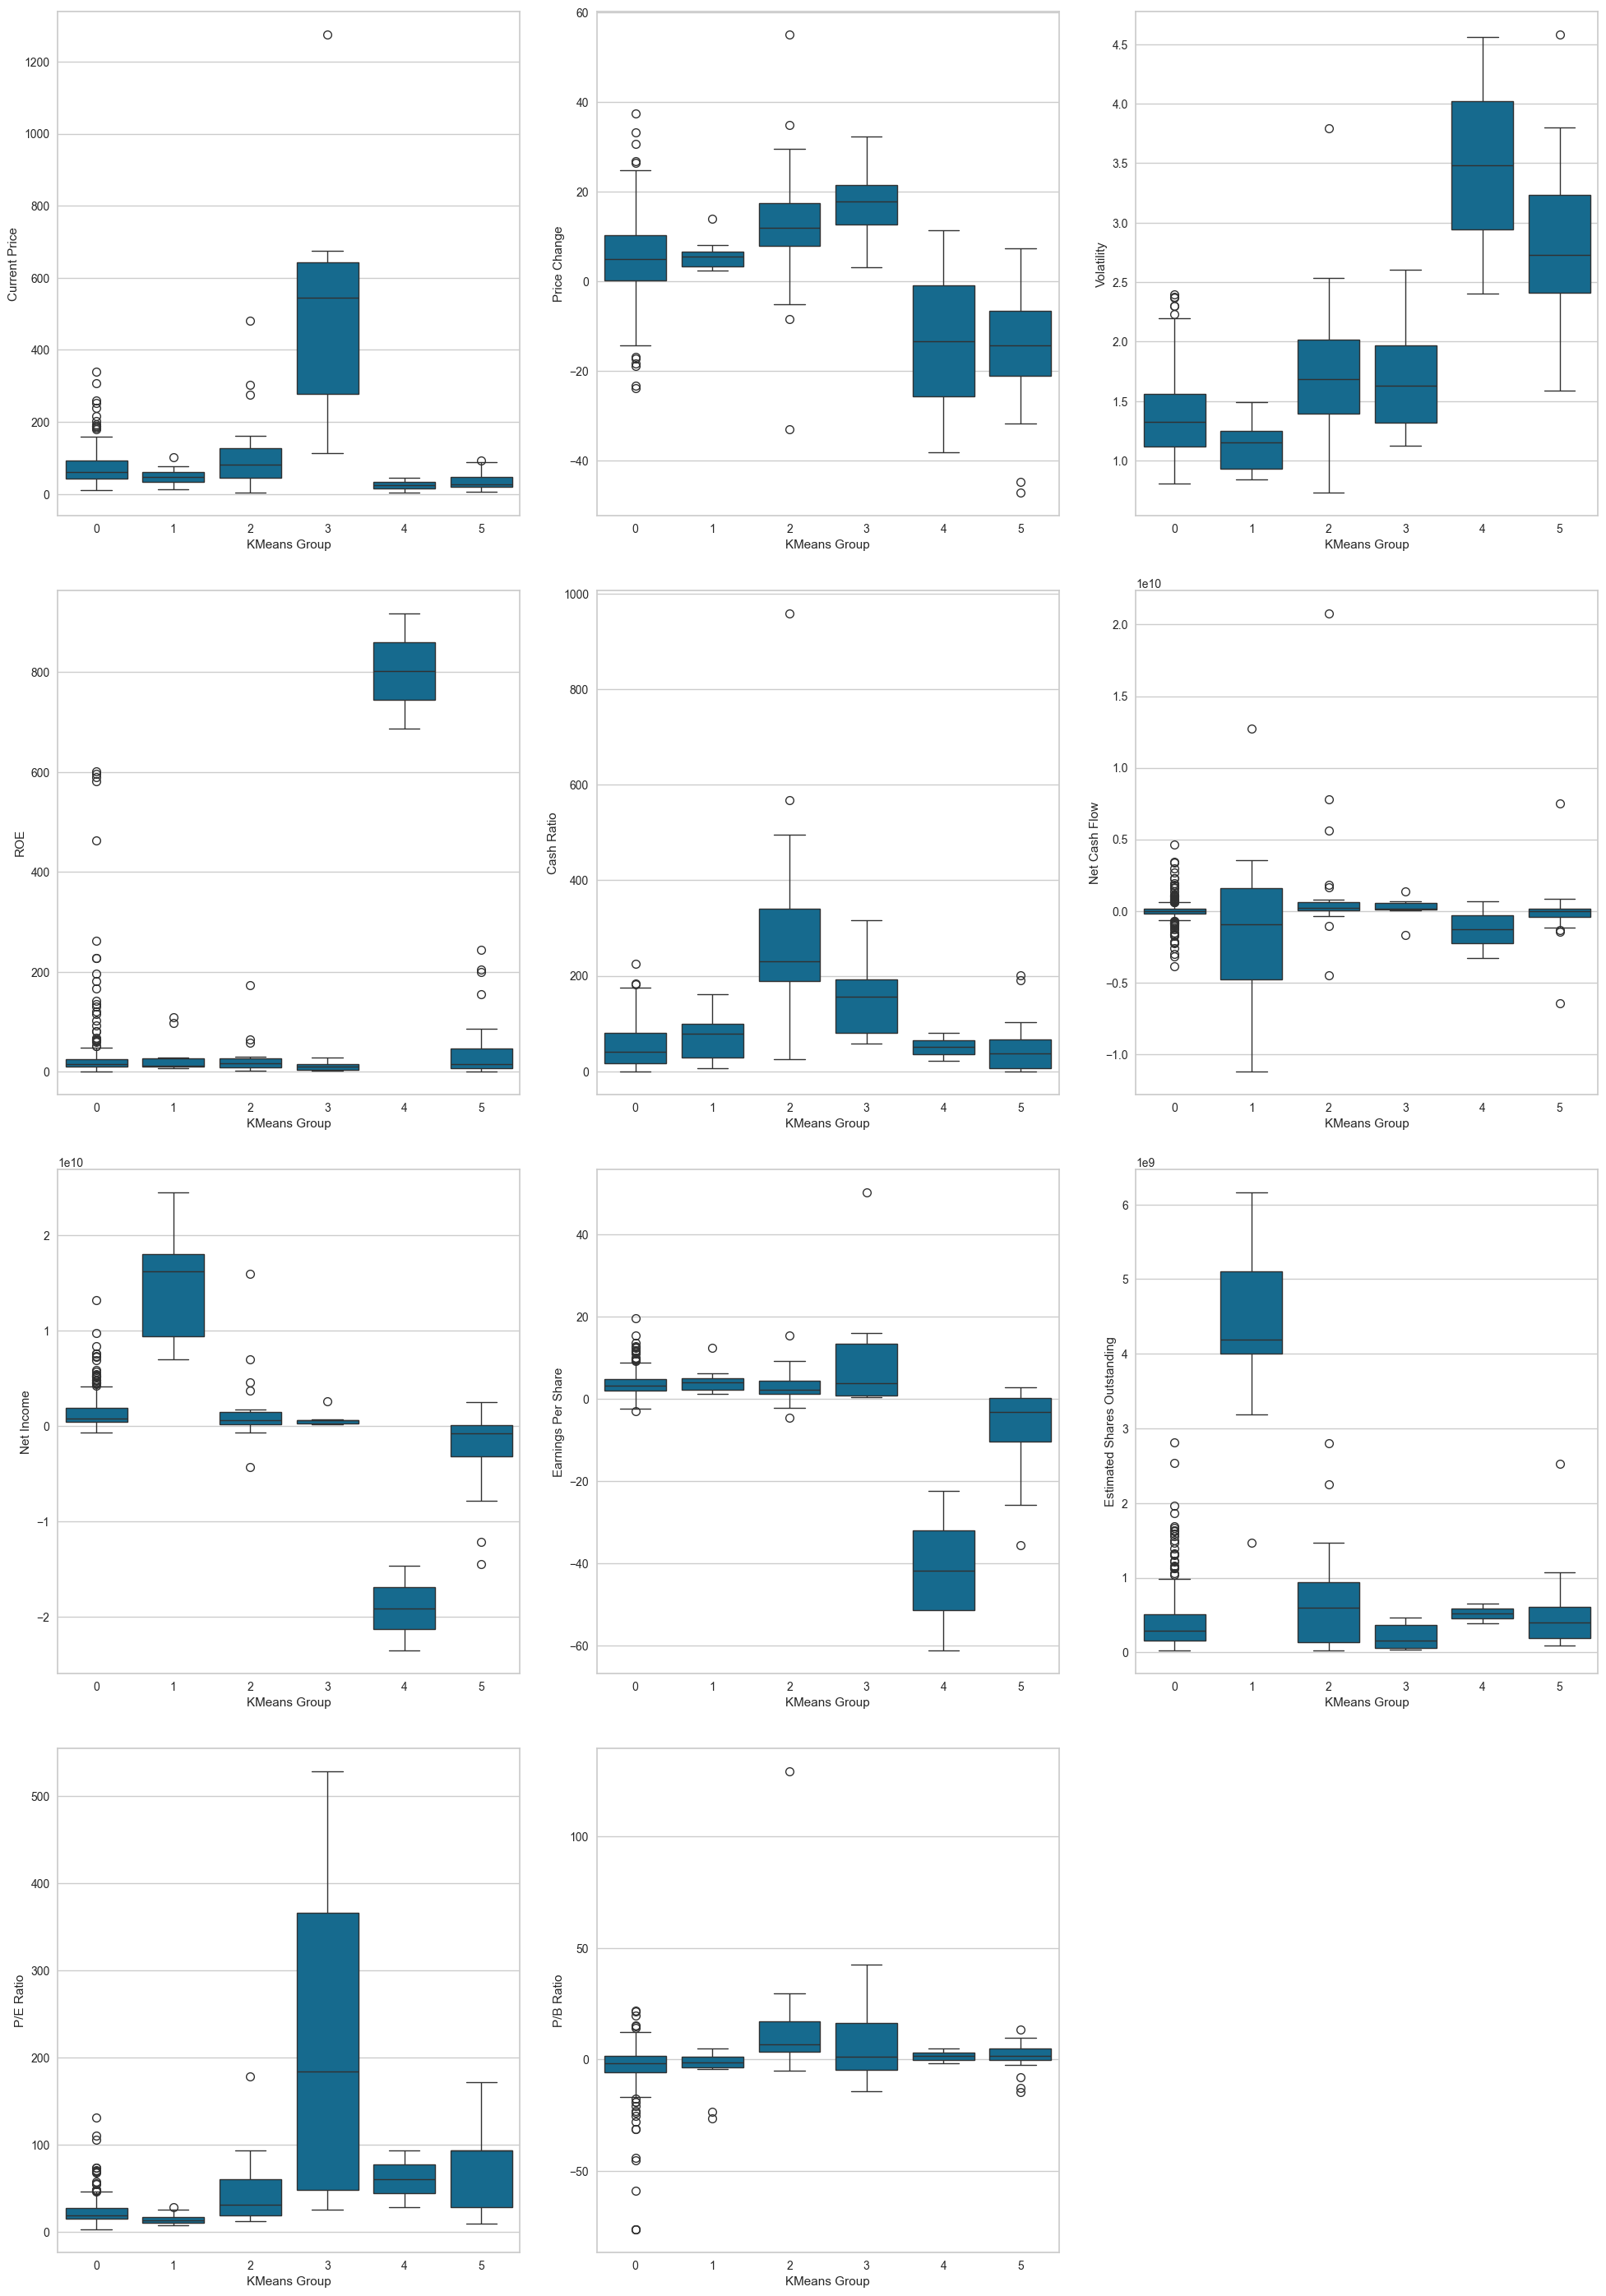

In [40]:
plt.figure(figsize=(20,35))
for i, var in enumerate(num_cols):
    plt.subplot(5,3,i+1)
    sns.boxplot(data, x=kmeansdata['KMeans Group'], y=var)
    
plt.tight_layout(pad=2.0)

According to the boxplots, some interesting points are:
* Group 3 has the highest median Current Price
* Group 3 has had the most positive median price change, and Group 4 and 5 have the most negative.
* Group 4 has the highest median volatility. 
* Group 4 has the highest median ROE. 
* Group 1 has the highest median Net Income and Group 4 has the lowest.
* Group 2 has the highest median Earnings Per Share.

## Hierarchical Clustering

In [41]:
HCdata = data.copy()

In [42]:
dist_methods = ['euclidean','chebyshev','mahalanobis','cityblock']

linkage_methods = ['single','complete','average','weighted']

highest_cophen = -1
best_dm_and_lm = [0,0]

for i in dist_methods:
    for n in linkage_methods:
        link = linkage(dfscaled, metric=i, method = n)
        c, coph_dist = cophenet(link, pdist(dfscaled))
        print('The Cophenetic Correlation for {} distance with the {} method is {}'.format(i,n,round(c,3)))
        
        if c > highest_cophen:
            highest_cophen = c
            best_dm_and_lm[0] = i
            best_dm_and_lm[1] = n

The Cophenetic Correlation for euclidean distance with the single method is 0.923
The Cophenetic Correlation for euclidean distance with the complete method is 0.787
The Cophenetic Correlation for euclidean distance with the average method is 0.942
The Cophenetic Correlation for euclidean distance with the weighted method is 0.869
The Cophenetic Correlation for chebyshev distance with the single method is 0.906
The Cophenetic Correlation for chebyshev distance with the complete method is 0.599
The Cophenetic Correlation for chebyshev distance with the average method is 0.934
The Cophenetic Correlation for chebyshev distance with the weighted method is 0.913
The Cophenetic Correlation for mahalanobis distance with the single method is 0.926
The Cophenetic Correlation for mahalanobis distance with the complete method is 0.793
The Cophenetic Correlation for mahalanobis distance with the average method is 0.925
The Cophenetic Correlation for mahalanobis distance with the weighted method is

In [43]:
print('The highest Cophenetic Correlation is {}, using {} distance and {} method'.format(round(highest_cophen,3),best_dm_and_lm[0],best_dm_and_lm[1]))

The highest Cophenetic Correlation is 0.942, using euclidean distance and average method


In [44]:
euc_lm = ['single','complete','average','weighted','centroid','ward']

for i in euc_lm:
    euc_link=linkage(dfscaled,metric='euclidean',method=i)
    euc_c, euc_coph_dist = cophenet(euc_link, pdist(dfscaled))
    print(f'Cophenetic Corr for {i} method is {round(euc_c,3)}')

Cophenetic Corr for single method is 0.923
Cophenetic Corr for complete method is 0.787
Cophenetic Corr for average method is 0.942
Cophenetic Corr for weighted method is 0.869
Cophenetic Corr for centroid method is 0.931
Cophenetic Corr for ward method is 0.71


The Euclidean Distance with the average linkage method gives the highest cophenetic correlation of 0.942.

#### Dendrograms

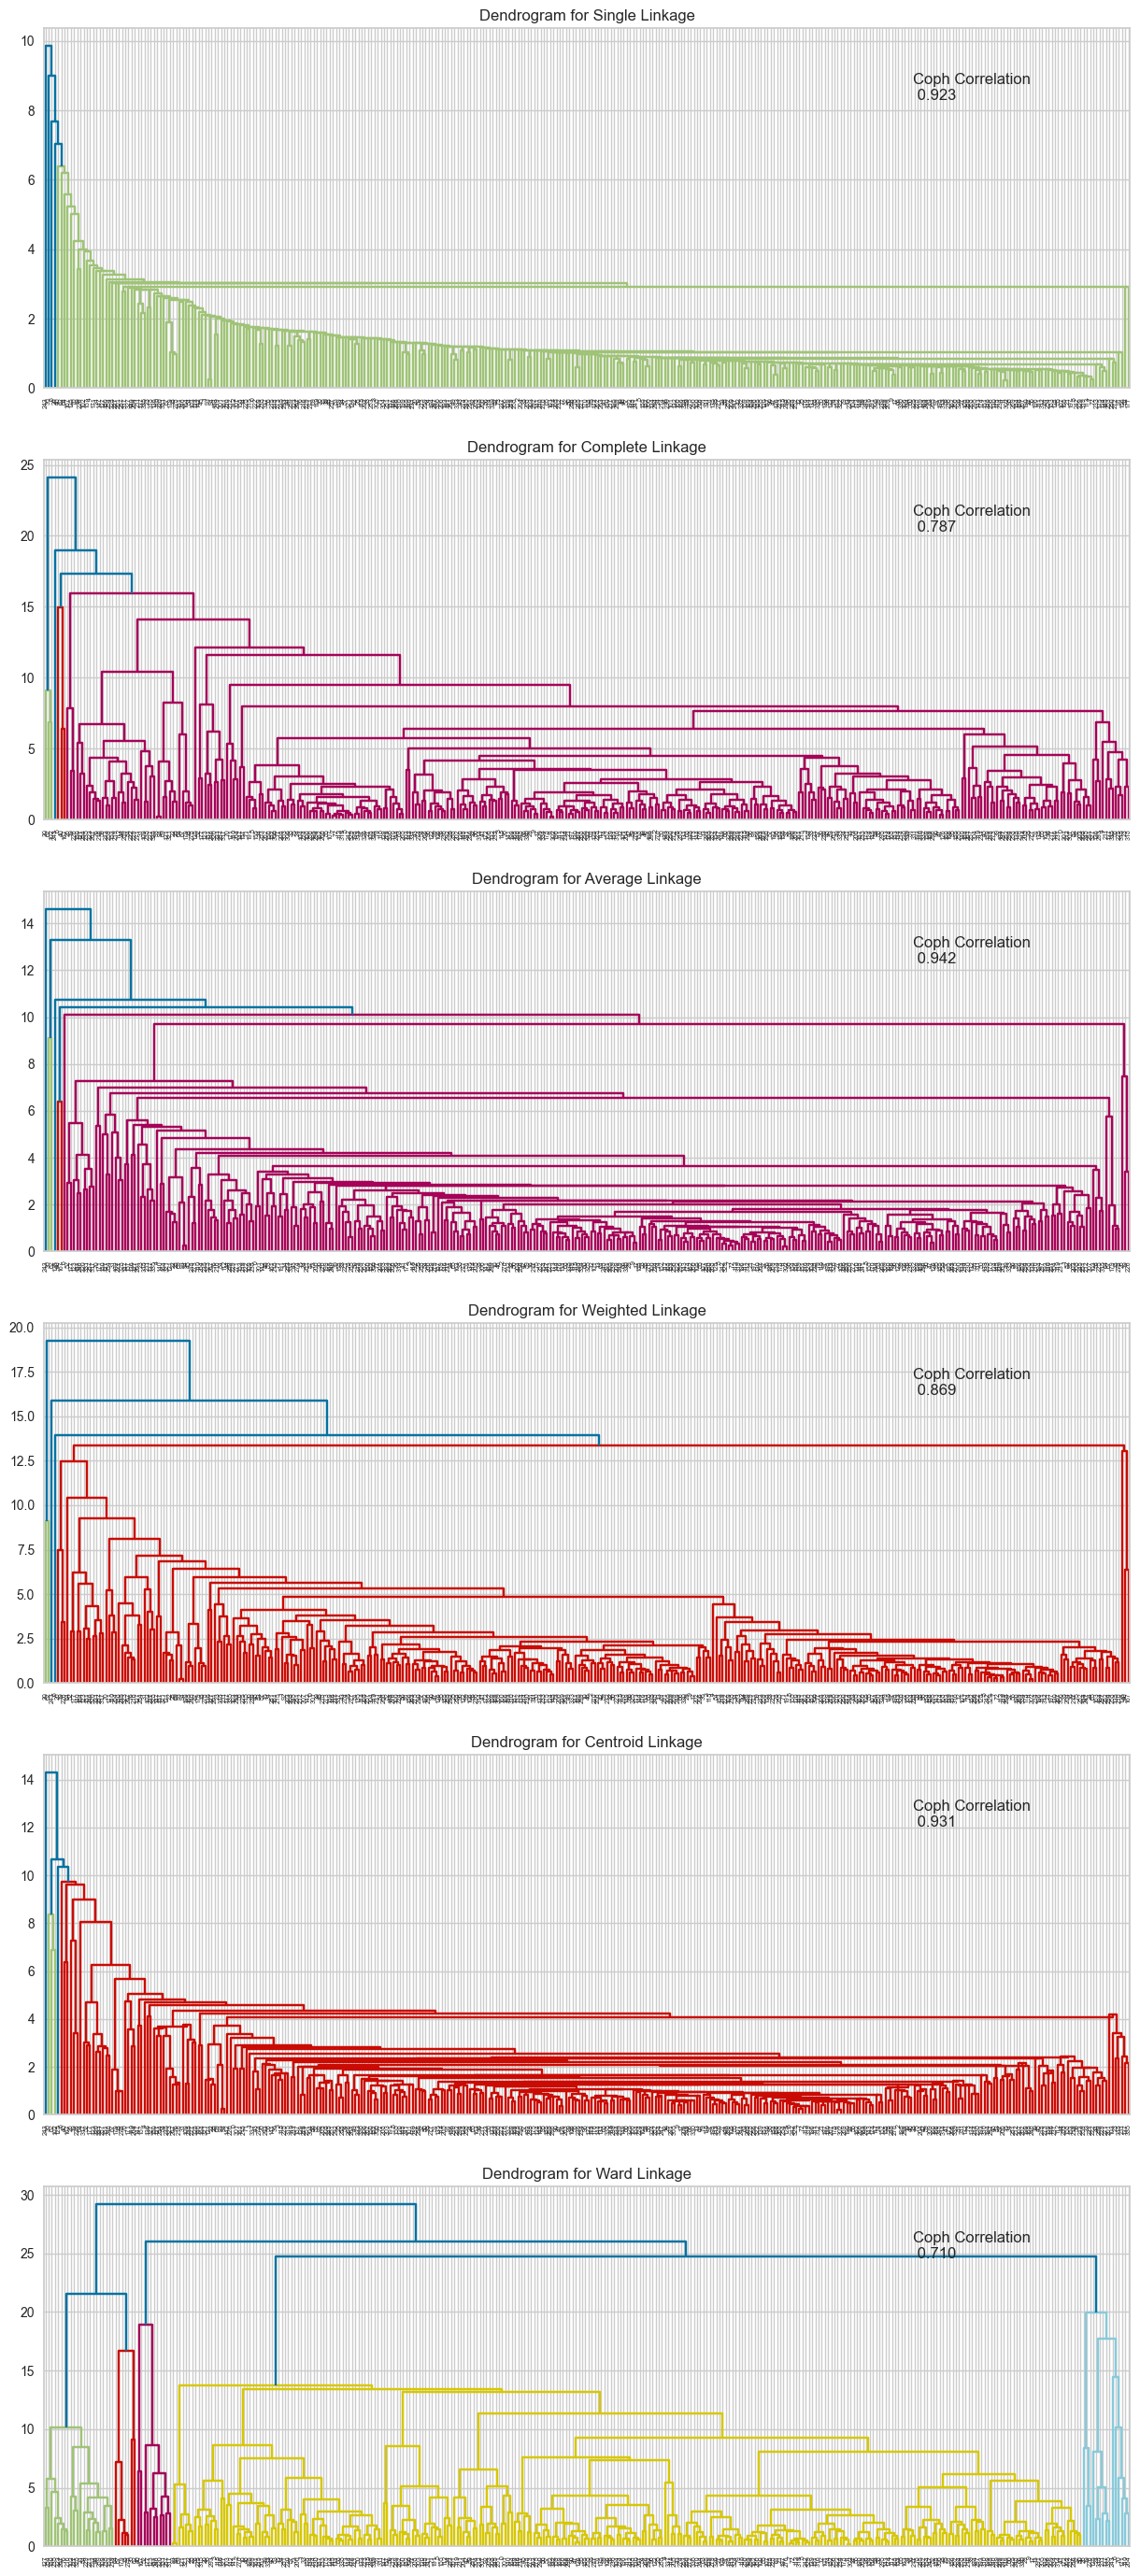

In [45]:
f, ax = plt.subplots(len(euc_lm),1, figsize=(15,35))

for i, m in enumerate(euc_lm):
    dend_link = linkage(dfscaled, metric='euclidean', method=m)
    
    dendrogram(dend_link, ax=ax[i])
    ax[i].set_title(f'Dendrogram for {m.capitalize()} Linkage')
    
    dend_corr, dend_dist = cophenet(dend_link, pdist(dfscaled))
    ax[i].annotate(f'Coph Correlation \n {dend_corr:0.3f}', (0.80,0.80), xycoords='axes fraction')
                    

For Average linkage, a good number of clusters seems to be 5.

#### Average Linkage Model

In [46]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
HCmodel.fit(dfscaled)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [47]:
HCdata['HC Clusters']=HCmodel.labels_

In [48]:
HCdata.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  HC Clusters  
0                  6.681299e+08    3.718174  -8.784219            0  
1                  1.633016e+09   18.806350  -8.750068            0  
2                  1.504422e+09   15.275510  -0.394171            0  
3                  4.996437e+08   74.555557   4.199651            0  
4                  2.247994e+09  178.451613   1.059810            0

#### Cluster Profile For Average Linkage Model

In [49]:
avg_cluster_profile = HCdata.groupby('HC Clusters').mean()
avg_cluster_profile

Current Price  Price Change  Volatility         ROE  Cash Ratio  \
HC Clusters                                                                    
0                77.884243      4.105986    1.516865   35.320359   66.775449   
1                25.640000     11.237908    1.322355   12.500000  130.500000   
2                24.485001    -13.351992    3.482611  802.000000   51.000000   
3               104.660004     16.224320    1.320606    8.000000  958.000000   
4              1274.949951      3.190527    1.268340   29.000000  184.000000   

             Net Cash Flow    Net Income  Earnings Per Share  \
HC Clusters                                                    
0            -3.282582e+07  1.535256e+09            2.903308   
1             1.675550e+10  1.365400e+10            3.295000   
2            -1.292500e+09 -1.910650e+10          -41.815000   
3             5.920000e+08  3.669000e+09            1.310000   
4            -1.671386e+09  2.551360e+09           50.090000   

             Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
HC Clusters                                                      
0                            5.590273e+08  32.437511  -1.781988  
1                            2.791829e+09  13.649696   1.508484  
2                            5.195740e+08  60.748608   1.565141  
3                            2.800763e+09  79.893133   5.884467  
4                            5.093552e+07  25.453183  -1.052429

In [50]:
for i in HCdata['HC Clusters'].unique():
    print("In cluster {}, the following {} companies are present: \n {} \n". 
          format(i,HCdata[HCdata['HC Clusters']==i]['Ticker Symbol'].nunique(),HCdata[HCdata['HC Clusters']==i]['Ticker Symbol'].unique()))


In cluster 0, the following 334 companies are present: 
 ['AAL' 'ABBV' 'ABT' 'ADBE' 'ADI' 'ADM' 'ADS' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV'
 'AIZ' 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AME' 'AMG'
 'AMGN' 'AMP' 'AMT' 'AMZN' 'AN' 'ANTM' 'AON' 'APC' 'APH' 'ARNC' 'ATVI'
 'AVB' 'AVGO' 'AWK' 'AXP' 'BA' 'BAX' 'BBT' 'BCR' 'BHI' 'BIIB' 'BK' 'BLL'
 'BMY' 'BSX' 'BWA' 'BXP' 'C' 'CAT' 'CB' 'CBG' 'CCI' 'CCL' 'CELG' 'CF'
 'CFG' 'CHD' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CMA' 'CME' 'CMG' 'CMI' 'CMS'
 'CNC' 'CNP' 'COF' 'COG' 'COO' 'CSX' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'CXO'
 'D' 'DAL' 'DD' 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DLPH' 'DLR'
 'DNB' 'DOV' 'DPS' 'DUK' 'DVA' 'DVN' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'EMN'
 'EOG' 'EQIX' 'EQR' 'EQT' 'ES' 'ESS' 'ETFC' 'ETN' 'ETR' 'EW' 'EXC' 'EXPD'
 'EXPE' 'EXR' 'F' 'FAST' 'FBHS' 'FCX' 'FE' 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS'
 'FMC' 'FRT' 'FSLR' 'FTR' 'GD' 'GGP' 'GILD' 'GLW' 'GM' 'GPC' 'GRMN' 'GT'
 'GWW' 'HAL' 'HAS' 'HBAN' 'HCA' 'HCN' 'HCP' 'HES' 'HIG' 'HOG' 'HO

These clusters do not have enough variability, so we will try again with the ward linkage method, as the dendrogram has more distinct clusters.

### Final HC Model

In [51]:
HC_final = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
HC_final.fit(dfscaled)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [52]:
HCdata['HC Clusters']=HC_final.labels_
HCdata.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  HC Clusters  
0                  6.681299e+08    3.718174  -8.784219            3  
1                  1.633016e+09   18.806350  -8.750068            3  
2                  1.504422e+09   15.275510  -0.394171            3  
3                  4.996437e+08   74.555557   4.199651            3  
4                  2.247994e+09  178.451613   1.059810            3

In [53]:
ward_cluster_profile = HCdata.groupby('HC Clusters').mean()
ward_cluster_profile

Current Price  Price Change  Volatility         ROE  Cash Ratio  \
HC Clusters                                                                    
0               326.198218     10.563242    1.642560   14.400000  309.466667   
1                84.355716      3.854981    1.827670  633.571429   33.571429   
2                42.848182      6.270446    1.123547   22.727273   71.454545   
3                72.760400      5.213307    1.427078   25.603509   60.392982   
4                36.440455    -16.073408    2.832884   57.500000   42.409091   

             Net Cash Flow    Net Income  Earnings Per Share  \
HC Clusters                                                    
0             2.888507e+08  8.644985e+08            7.785333   
1            -5.684000e+08 -4.968157e+09          -10.841429   
2             5.586364e+08  1.463127e+10            3.410000   
3             7.995151e+07  1.538594e+09            3.655351   
4            -4.728341e+08 -3.161045e+09           -8.005000   

             Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
HC Clusters                                                       
0                            5.449003e+08  113.095334  19.142151  
1                            3.981690e+08   42.284541 -11.589502  
2                            4.242573e+09   15.242169  -4.924615  
3                            4.464721e+08   24.722670  -2.647194  
4                            5.143678e+08   85.555682   0.836839

In [54]:
for i in HCdata['HC Clusters'].unique():
    print("In cluster {}, the following {} companies are present: \n {} \n". 
          format(i,HCdata[HCdata['HC Clusters']==i]['Ticker Symbol'].nunique(),HCdata[HCdata['HC Clusters']==i]['Ticker Symbol'].unique()))

In cluster 3, the following 285 companies are present: 
 ['AAL' 'ABBV' 'ABT' 'ADBE' 'ADI' 'ADM' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV' 'AIZ'
 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'AMAT' 'AME' 'AMG' 'AMP' 'AMT' 'AN' 'ANTM'
 'AON' 'APH' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AWK' 'AXP' 'BA' 'BAX' 'BBT' 'BCR'
 'BIIB' 'BK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'CAT' 'CB' 'CBG' 'CCI' 'CCL'
 'CELG' 'CF' 'CFG' 'CHD' 'CHRW' 'CI' 'CINF' 'CMA' 'CME' 'CMI' 'CMS' 'CNC'
 'CNP' 'COF' 'COO' 'CSX' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'D' 'DAL' 'DD'
 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DLPH' 'DLR' 'DNB' 'DOV'
 'DPS' 'DUK' 'DVA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'EMN' 'EQR' 'EQT' 'ES'
 'ESS' 'ETFC' 'ETN' 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE' 'EXR' 'FAST' 'FBHS'
 'FE' 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS' 'FMC' 'FRT' 'FSLR' 'GD' 'GGP' 'GILD'
 'GLW' 'GM' 'GPC' 'GRMN' 'GT' 'GWW' 'HAL' 'HAS' 'HBAN' 'HCA' 'HCN' 'HCP'
 'HIG' 'HOG' 'HON' 'HPE' 'HPQ' 'HRL' 'HSIC' 'HST' 'HSY' 'HUM' 'IBM' 'IDXX'
 'IFF' 'IP' 'IPG' 'IRM' 'ITW' 'IVZ' 'JBHT' 'JEC' 'JNPR' 'KIM' '

While the clusters are still uneven, they have more variety. 

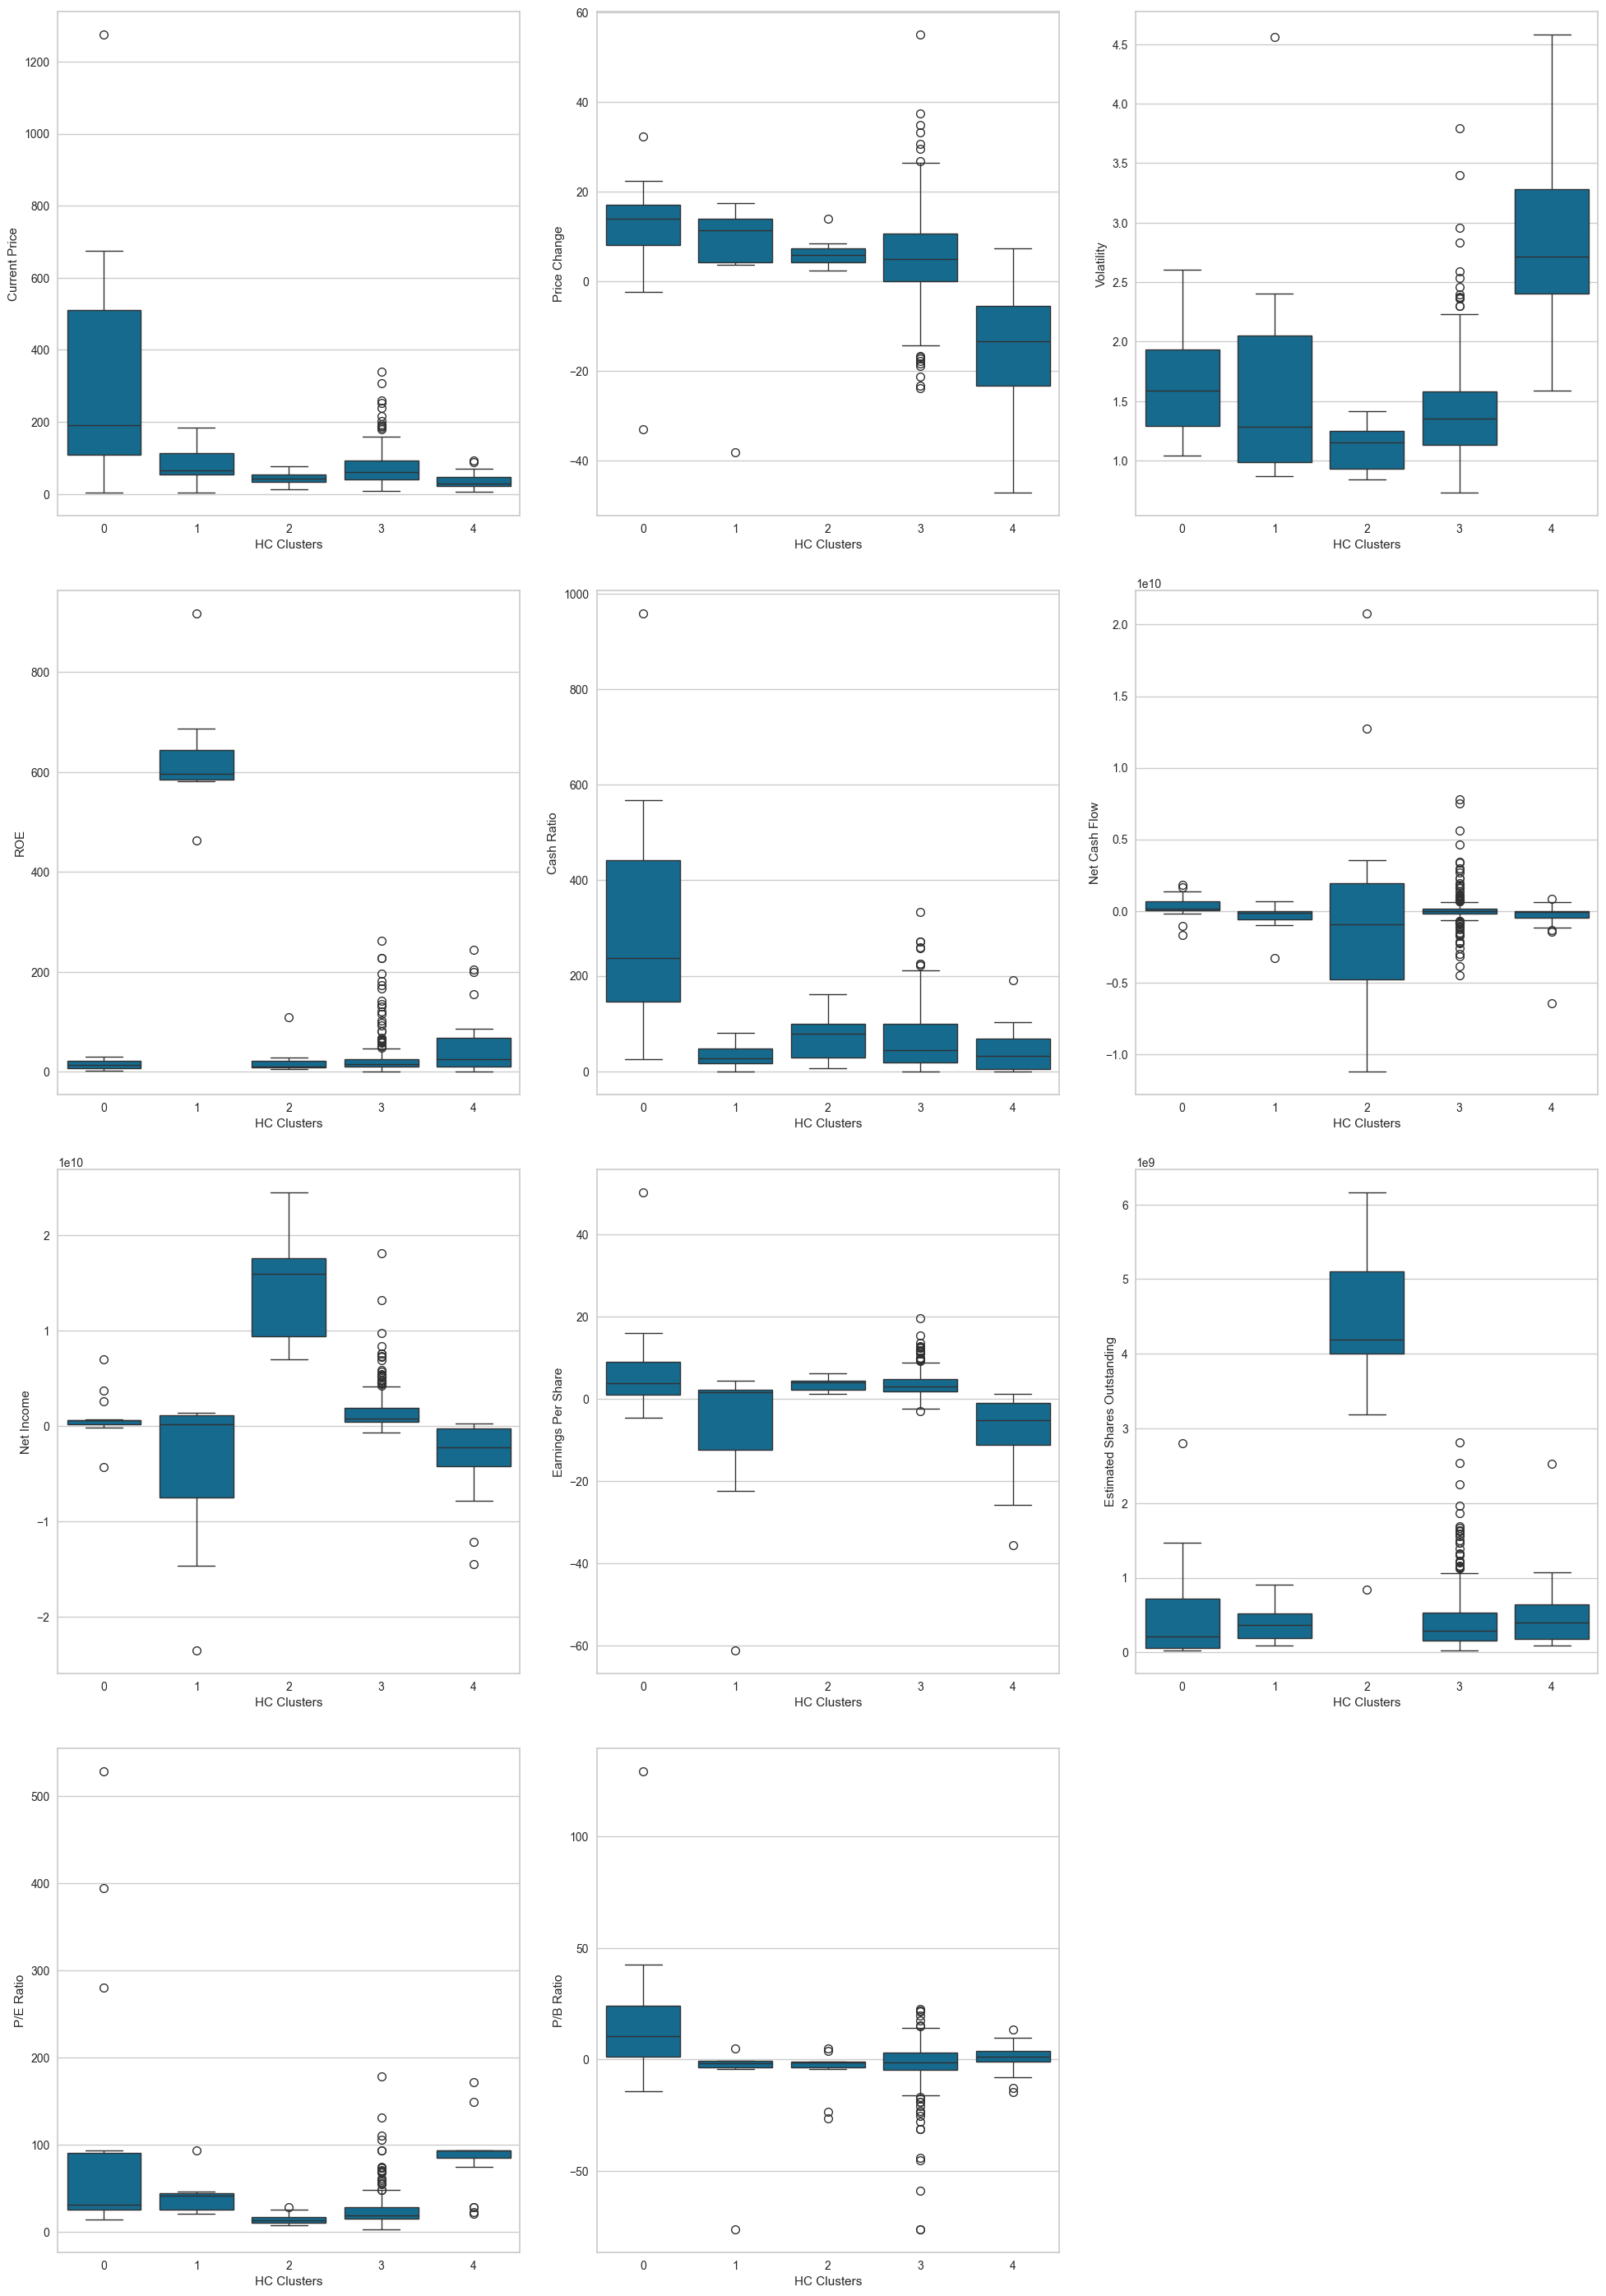

In [55]:
plt.figure(figsize=(20,35))
for i, var in enumerate(num_cols):
    plt.subplot(5,3,i+1)
    sns.boxplot(HCdata, x=HCdata['HC Clusters'].astype(int), y=var)
    
plt.tight_layout(pad=2.0)

According the boxplots, some interesting points are:

* Cluster 0 has had the highest positive price change while cluster 4 has had the most negative price change. 
* Cluster 4 has the highest volatility 
* Cluster 1 has the highest ROE
* Cluster 0 has the highest median Cash Ratio
* Cluster 2 has the highest median Net Income
* Cluster 2 has the highest median outstanding shares

## K-means vs Hierarchical Clustering

- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?


* The KMeans Model took less time to execute as the elbow method and silhouette scorer was a quick method to figure out the optimal number of clusters to buld the model. The Hierarchical Clustering method needed to find multiple cophenetic scores and then build multiple dendrograms for find the optimal number of clusters, distance method, and linkage method, so it took longer.  
* Since KMeans used 7 clusters and HC used 5, the KMeans technique naturally has more distinct clusters.
* In the largest cluster for KMeans, there are 270 companies in cluster 0, and for HC, there 285 companies in cluster 3. So in similar clusters, there are similar number of observations.

## Actionable Insights and Recommendations
When using KMeans Clustering:
- The companies in Group 3 seem to be a good option for investment opportunities. They have the most positive price change and fairly low volatilty. So investors can have an easier time in predicting future stock changes. Their median current price is also the highest, so while it may be expensive to invest now, keeping an eye on these companies would be a good idea. The other features are fairly middle ground for Group 3.
- The group to avoid is Group 4. It has the highest median volatility, and so it is unpredictable. Group 4 has one of the most negative price changes among the groups, but its current price is still comparable to other, less volatile, groups. This group also has the lowest median net income.    
- Group 0 has the most companies by far, and the data shows that features are fairly stable. However, with this many companies in a group, it can be hard to tell which companies are the stable ones.

When using Hierarchical Clustering:
- It is harder to tell with Hierarchical Clustering, but it seems that the companies in Cluster 2 are good options to keep in mind when investing. They have the lowest median volatility along with a slightly positive price change. They also have the highest median net income. However, they have a high median shares outstanding, meaning that stockholders hold most of the stock. This may lead to problems down the line. 
- A cluster to avoid may be Cluster 4. These companies have a high volatility with the most negative price change, and their current price is still comparable to other clusters. So it would likely be a better idea to look into investing in the other clusters instead. They also have the lowest median net income by a small margin.